# FIT5196 Assessment 3
#### Student Name: Pichaphop Sunthornjittanon
#### Student ID: 31258301

Date: 29/10/21
 ##############################

Environment: Python 3.6.0 and Google Colab (Table of Contents are provided for Google Colab)

# Introduction

For this assessment, you are required to write Python code to integrate several datasets into one
single schema and find and fix possible problems in the data.

# Importing libraries & Mounting Google Drive

In [291]:
# Download pdfminer
!pip install pdfminer.six==20181108

# Download pyshp for shapefile 
!pip install pyshp

# Use for import pdf file
from io import StringIO
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser

# Use for dealing with dataframe
import pandas as pd

# Use for dealing with XML and  HTML files
from bs4 import BeautifulSoup

# Use for dealing with JSON files
import json

# Use for dealing with shapefiles
import shapefile

# Use for dealing with array
import numpy as np

# Use for drawing polygon
from matplotlib.patches import Polygon

# Use for converting string into list
import ast

# Use for dealing with regular expression
import re

# Use for dealing with datetime format
import datetime

# Use for opening URL
from urllib.request import urlopen

# Use for ploting
import matplotlib.pyplot as plt 

# Use for preprocessing (scaling/standadising)
from sklearn import preprocessing

# Use for mathematic operation (log)
import math

# Use for preprocessing (power transformation)
from sklearn.preprocessing import PowerTransformer

# Use for linear regression
from sklearn.linear_model import LinearRegression

# Use for train test split
from sklearn.model_selection import train_test_split

# Use for calculating r square
from sklearn.metrics import r2_score

# Use for calculating mean squared error
from sklearn.metrics import mean_squared_error

In [292]:
# Mount Google Drive in the colab environment
from google.colab import drive

drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task 1: Data Integration (55%)

In this task, you are required to integrate the input datasets from several sources into one dataset with the following schema(in the specification).

## 1.Getting **property_id,lat,lon and addr_street attributes** from xml and json files

In this section, our objective is to get data that contains following fields namely property_id, lat, lon and addr_street.

To do that, we can get these attributes from the given xml and json files(31258301.xml and 31258301.json). Therefore, 3 sub-steps were performed, which are :

1.1  Load 31258301.xml

1.2  Load 31258301.json 

1.3 Integrate 2 XML and JSON data sources (location_xml_df and location_json_df)

### 1.1 Load  31258301.xml





We use BeautifulSoup to parse XML data and extract attributes by utilising Beautifulsoups methods. After that, we put extracted attributes into dataframe

In [293]:
##### Load 31258301.xml (file) #####

# Import 31258301.xml 
btree = BeautifulSoup(open("/content/drive/Shareddrives/FIT5196-s2-2021-tutorials/Assessment 3/student_data/xml/31258301.xml"),"lxml") 

# Extract information in each column
property_id = [feature.string for feature in btree.find_all('property_id')]
lat = [feature.string for feature in btree.find_all('lat')]
lng = [feature.string for feature in btree.find_all('lng')]
addr_street = [feature.string for feature in btree.find_all('addr_street')]

# Initialise dictionary
dataDict = {}

# Add each data to dictionary
dataDict['property_id'] = property_id
dataDict['lat'] = lat
dataDict['lng'] = lng
dataDict['addr_street'] = addr_street

# Convert dictionary to dataframe
location_xml_df = pd.DataFrame(dataDict)


In [294]:
# Show first 5 rows of location_xml_df
location_xml_df.head()

,property_id,lat,lng,addr_street
0,37646,-37.64603043,145.03019709999995,61 Davisson Street
1,37431,-37.655946,145.030604,403 Dalton Road
2,85591,-37.887565,145.006124,38 Orrong Road
3,77423,-37.92820800000001,145.184814,11 Southampton Drive
4,40541,-37.714607,145.032462,4 Bunker Avenue


In [295]:
# Print information about location_xml_df to see data structure 
location_xml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   property_id  1159 non-null   object
 1   lat          1159 non-null   object
 2   lng          1159 non-null   object
 3   addr_street  1159 non-null   object
dtypes: object(4)
memory usage: 36.3+ KB


### 1.2 Load  31258301.json

We simply use pd.read_json to import json file into location_json_df dataframe

In [296]:
# code to read the json file (Alternative way)
# with open('/content/drive/Shareddrives/FIT5196-s2-2021-tutorials/Assessment 3/student_data/json/31258301.json') as json_file:
#     data = json.load(json_file)

# location_json_df = pd.json_normalize(data)

# Load 31258301.json into location_json_df
location_json_df = pd.read_json('/content/drive/Shareddrives/FIT5196-s2-2021-tutorials/Assessment 3/student_data/json/31258301.json')


In [297]:
# Show first 5 rows of location_xml_df
location_json_df.head()

,property_id,lat,lng,addr_street
0,67795,-37.762158,145.357421,"Lot,4 Old Gippsland Road"
1,17632,-37.698235,144.932258,70 Hilda Street
2,44106,-37.708801,145.098601,108 Nell Street
3,40410,-37.711241,145.055039,33 Grange Boulevard
4,92456,-37.979576,145.062678,85 Collins Street


In [298]:
# Print information about location_json_df to see data structure 
location_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   property_id  1163 non-null   int64  
 1   lat          1163 non-null   float64
 2   lng          1163 non-null   float64
 3   addr_street  1163 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 36.5+ KB


### 1.3 Integrate 2 XML and JSON data sources (location_xml_df and location_json_df)

As we can can see from the previous two data frame information, column data types of both table are not consistent.Before integrating them, converting datatype to appropriate format is performed beforehand. We will change datatype in location_xml_df columns to be consistent as location_json_df

In [299]:
# Convert datatype in location_xml_df
location_xml_df['property_id'] = location_xml_df['property_id'].astype(int)
location_xml_df['lat'] = location_xml_df['lat'].astype(float)
location_xml_df['lng'] = location_xml_df['lng'].astype(float)
location_xml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   property_id  1159 non-null   int64  
 1   lat          1159 non-null   float64
 2   lng          1159 non-null   float64
 3   addr_street  1159 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 36.3+ KB


Once both dataframes have same data types, we combine them together using append method and create the variable name **final_df**

* Remark : We will use final_df as a final dataframe before writing to csv output.In each section, new attributes will be added into final_df

In [300]:
# Combine 2 dataframe (location_xml_df and location_json_df) and create final_df
final_df = location_xml_df.append(location_json_df,ignore_index=True)

# Round lat and lng to 6 decimal places
final_df['lat'] = round(final_df['lat'],6)
final_df['lng'] = round(final_df['lng'],6)

After combining two data frame together, it is a good practice to check duplication among combined data. As a result, there are duplication in this data

In [301]:
# Explore for potential duplication
final_df[final_df.duplicated('property_id',keep = False)].sort_values('property_id').head(24)

,property_id,lat,lng,addr_street
62,1008,-37.796477,144.897762,41 Geelong Road
1780,1008,-37.796477,144.897762,41 Geelong Road
1416,9221,-37.857510,144.717901,1 Huntley Terrace
1357,9221,-37.857510,144.717901,1 Huntley Terrace
901,11138,-37.783114,144.935049,140-142 Mt Alexander Road
2098,11138,-37.783114,144.935049,140-142 Mt Alexander Road
958,14118,-37.759359,144.905041,24 Aberfeldie Street
892,14118,-37.759359,144.905041,24 Aberfeldie Street
2279,17632,-37.698235,144.932258,70 Hilda Street
1160,17632,-37.698235,144.932258,70 Hilda Street


After we found duplication and explore duplicate pattern, we can simply remove them and keep only first elements in the data.

In [302]:
# Deduplicate
final_df.drop_duplicates('property_id',keep ='first',inplace= True)
final_df.reset_index(inplace= True,drop=True)

In [303]:
# Info of final_df
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2286 entries, 0 to 2285
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   property_id  2286 non-null   int64  
 1   lat          2286 non-null   float64
 2   lng          2286 non-null   float64
 3   addr_street  2286 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 71.6+ KB


In [304]:
# Print final_df statistics 
final_df.describe()

,property_id,lat,lng
count,2286.000000,2286.000000,2286.000000
mean,48112.740157,-37.804515,145.043286
std,27859.320327,0.097457,0.135191
min,10.000000,-38.077245,144.637373
25%,24447.750000,-37.861441,144.950020
50%,47695.500000,-37.797992,145.035437
75%,72120.500000,-37.739245,145.125618
max,97059.000000,-37.570559,145.374847


As a result, we get property_id,lat,lon and addr_street from xml and json files

## 2.Getting **suburb attribute** from Vic_suburd_boundary shapefiles

Next, we want to add surburb attribute into final_df dataframe. To do that, we utilise 3 given shapefile from Vic_suburd_boundary directory. Four steps were performed, which are

2.1 Load 3 shapefiles from Vic_suburd_boundary directory

2.2 Create list of tuple (Suburb name, Polygon object)

2.3 Find suburbs of given latitudes & lontitudes and add them back to final_df

### 2.1 Load 3 shapefiles from Vic_suburd_boundary directory

First, we load three shape files using shapefile.Reader, then stores records and shapes into recs and shapes variables respectively

In [305]:
# Read shape file (3 files)
sf = shapefile.Reader("/content/drive/Shareddrives/FIT5196-s2-2021-tutorials/Assessment 3/supplementary_data/vic_suburb_bounadry/VIC_LOCALITY_POLYGON_shp") 
recs = sf.records()
shapes = sf.shapes()

### 2.2 Create list of tuple (Suburb name, Polygon object)

Next, we extract suburb name from recs and Polygon object from shapes (will use for identifying suburb of given lat and lon) stored in list of tuple format

In [306]:
# Get the length of shapes
Nshp = len(shapes)

# Initialise ptchs list
ptchs= []

# for each nshp
for nshp in range(Nshp): 
    pts     = np.array(shapes[nshp].points)
    prt     = shapes[nshp].parts
    par     = list(prt) + [pts.shape[0]]

    for pij in range(len(prt)): 
        ptchs.append((recs[nshp][6],Polygon(pts[par[pij]:par[pij+1]])))


In [307]:
# Show sample of ptchs list
ptchs[0:5]

[('UNDERBOOL', <matplotlib.patches.Polygon at 0x7f82bd41cf10>),
 ('NURRAN', <matplotlib.patches.Polygon at 0x7f82a1f6f290>),
 ('WOORNDOO', <matplotlib.patches.Polygon at 0x7f82bd41f350>),
 ('DEPTFORD', <matplotlib.patches.Polygon at 0x7f82bd41f3d0>),
 ('YANAC', <matplotlib.patches.Polygon at 0x7f82bd41f690>)]

### 2.3 Find suburbs of given latitudes & lontitudes and add them back to final_df

In this part, we traverse across final_df in each row to get lat and lon. We use lat and lon in each row to find suburb that lat and lon belong to using ptchs (list of tuple) that we created in previous section. Once, we identified suburb in each row, we add to suburb list and used that list to add back to final_df. 

Remark: If there is no suburb for the given lat and lon, default value is assigned (not available)

In [308]:
# Initialise suburb list and prev_list_len
suburbs_list = []
prev_list_len = len(suburbs_list)

# In each iteration find the suburb that lat & lon belong to
for index,row in final_df.iterrows():


  for i in range(len(ptchs)):
      if ptchs[i][1].contains_point((float(row['lng']),float(row['lat']))):
          suburbs_list.append(ptchs[i][0])

  # Find current iteration suburbs_list length
  cur_list_len = len(suburbs_list)

  # If lat/lng cannot be found from the given Polygon add default value(not available) to the list
  if cur_list_len == prev_list_len :
    suburbs_list.append("not available")

  # create previous iteration suburbs_list length
  prev_list_len = cur_list_len

In [309]:
# Add suburb to final_df
final_df['suburb'] = suburbs_list

In [310]:
# Show first 5 rows
final_df.head()

,property_id,lat,lng,addr_street,suburb
0,37646,-37.646030,145.030197,61 Davisson Street,EPPING
1,37431,-37.655946,145.030604,403 Dalton Road,EPPING
2,85591,-37.887565,145.006124,38 Orrong Road,ELSTERNWICK
3,77423,-37.928208,145.184814,11 Southampton Drive,MULGRAVE
4,40541,-37.714607,145.032462,4 Bunker Avenue,KINGSBURY


In [311]:
# Show final_df info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2286 entries, 0 to 2285
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   property_id  2286 non-null   int64  
 1   lat          2286 non-null   float64
 2   lng          2286 non-null   float64
 3   addr_street  2286 non-null   object 
 4   suburb       2286 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 89.4+ KB


## 3.Getting **LGA attribute** from Lga_to_suburb.pdf

In this section, our objective is to find LGA from the Lga_to_suburb.pdf.
The process is divided into 3 sub-tasks, which are :

3.1 Load the Lga_to_suburb.pdf into raw text file

3.2 Use regular expression to extract LGA and suburb

3.3 Pre-process the data to get lga master

3.4 Left join lga_master on final_df to get lga for each property_id

### 3.1 Load the Lga_to_suburb.pdf into raw text file

First, we import pdf into raw text file using pdfminer (reference is provided)

In [312]:
# Import PDF File
# Reference : https://pdfminersix.readthedocs.io/en/latest/tutorial/composable.html

output_string = StringIO()
with open('/content/drive/Shareddrives/FIT5196-s2-2021-tutorials/Assessment 3/supplementary_data/lga_to_suburb.pdf', 'rb') as in_file:
    parser = PDFParser(in_file)
    doc = PDFDocument(parser)
    rsrcmgr = PDFResourceManager()
    device = TextConverter(rsrcmgr, output_string, laparams=LAParams())
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    for page in PDFPage.create_pages(doc):
        interpreter.process_page(page)

# Store the raw data from PDF in raw_text
raw_text = output_string.getvalue()

### 3.2 Use regular expression to extract LGA and suburb

Then, we use regluar expression to get LGA (everything before :) and Suburb (everything after :) and strip them to get rid of white spaces

In [313]:
# Use regular expression to extract LGA and their suberb
LGA = re.findall(r"(.*):",raw_text)
suburb = re.findall(r":(.*)",raw_text)

# Strip the data
LGA = list(map(lambda x: x.strip(),LGA))
suburb = list(map(lambda x: x.strip(),suburb))

In [314]:
# Print sample of LGA and suburb lists
print(LGA[0:2])
print(suburb[0:2])

['BANYULE', 'BRIMBANK']
["['Abbotsford', 'Airport West', 'Albert Park', 'Alphington']", "['Altona', 'Altona North', 'Armadale', 'Ascot Vale']"]


### 3.3 Pre-process the data and add lga to final_df

We create new LGA_master dataframe, which contains lga and suburb. The suburb itself is still in string format, which starts with [ and end with ].Therefore, we convert suburb columns into list and explode them to get LGA_master. After that we change suburb cases into upper in order to be consistent with the previous sections

In [315]:
# Create LGA_master df, which contains data about suburb and LGA
LGA_master = pd.DataFrame()
LGA_master["lga"] = LGA
LGA_master["suburb"] = suburb

# Change datatype in suburb column into list
LGA_master["suburb"] = LGA_master['suburb'].apply(lambda x:ast.literal_eval(x))

# Explode the suburb column
LGA_master = LGA_master.explode('suburb').reset_index(drop = True)

# Change the suburb names to upper cases
LGA_master["suburb"] = LGA_master["suburb"].apply(lambda x: x.upper())

### 3.4 Left join lga_master with final_df to get lga for each property_id

Finally, we perform left join with the final_df with LGA_master to get LGA attribute and do some basic checking (head and info) 

In [316]:
# Left join on the final df with LGA master to get LGA
final_df = final_df.merge(LGA_master,left_on ='suburb',right_on ='suburb',how = 'left')

In [317]:
# Check for na
print('The number of na in LGA in final_df :',final_df['lga'].isna().sum())

# If lga is na, fill with default value (not available)
final_df['lga'].fillna('not available',inplace = True)

The number of na in LGA in final_df : 0


In [318]:
# Show first 5 rows
final_df.head()

,property_id,lat,lng,addr_street,suburb,lga
0,37646,-37.646030,145.030197,61 Davisson Street,EPPING,FRANKSTON
1,37431,-37.655946,145.030604,403 Dalton Road,EPPING,FRANKSTON
2,85591,-37.887565,145.006124,38 Orrong Road,ELSTERNWICK,MORELAND
3,77423,-37.928208,145.184814,11 Southampton Drive,MULGRAVE,MACEDON RANGES
4,40541,-37.714607,145.032462,4 Bunker Avenue,KINGSBURY,ALPINE


In [319]:
# Show final_df info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2286 entries, 0 to 2285
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   property_id  2286 non-null   int64  
 1   lat          2286 non-null   float64
 2   lng          2286 non-null   float64
 3   addr_street  2286 non-null   object 
 4   suburb       2286 non-null   object 
 5   lga          2286 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 125.0+ KB


## 4.Getting **closest_train_station** and **distance_to_closest_train** from GFTS files

In this section, we want to get closest_train_station and distance_to_closest from GFTS files. The steps are :

4.1 Load GFTS data (same as 5.1)

4.2 Explore GFTS data (same as 5.2)

4.3 Find the minimum distance from each property to the closest train station

4.4 Add closest_train_station and distance_to_closest to final_df


### 4.1 Load GFTS data 

First, we have to load all of GFTS data, which is in text file format seperating with comma

In [320]:
# Load GFTS data
agency_df = pd.read_table("/content/drive/Shareddrives/FIT5196-s2-2021-tutorials/Assessment 3/supplementary_data/Vic_GTFS_data /metropolitan/agency.txt",sep = ',')
calendar_df  = pd.read_table("/content/drive/Shareddrives/FIT5196-s2-2021-tutorials/Assessment 3/supplementary_data/Vic_GTFS_data /metropolitan/calendar.txt",sep = ',')
calendar_dates_df  = pd.read_table("/content/drive/Shareddrives/FIT5196-s2-2021-tutorials/Assessment 3/supplementary_data/Vic_GTFS_data /metropolitan/calendar_dates.txt",sep = ',')
routes_df  = pd.read_table("/content/drive/Shareddrives/FIT5196-s2-2021-tutorials/Assessment 3/supplementary_data/Vic_GTFS_data /metropolitan/routes.txt",sep = ',')
shapes_df  = pd.read_table("/content/drive/Shareddrives/FIT5196-s2-2021-tutorials/Assessment 3/supplementary_data/Vic_GTFS_data /metropolitan/shapes.txt",sep = ',')
stop_times_df  = pd.read_table("/content/drive/Shareddrives/FIT5196-s2-2021-tutorials/Assessment 3/supplementary_data/Vic_GTFS_data /metropolitan/stop_times.txt",sep = ',')
stops_df  = pd.read_table("/content/drive/Shareddrives/FIT5196-s2-2021-tutorials/Assessment 3/supplementary_data/Vic_GTFS_data /metropolitan/stops.txt",sep = ',')
trips_df  = pd.read_table("/content/drive/Shareddrives/FIT5196-s2-2021-tutorials/Assessment 3/supplementary_data/Vic_GTFS_data /metropolitan/trips.txt",sep = ',')

### 4.2 Explore GFTS data 

After loading all data, we do some data exploration in each data frame. In this part, we will use only stop_df, which contains data about stop_ids, stop names and their latitude/ lontitude. For other dataframes, some will be used in the next section (section 5) 

In [321]:
# Look at agency_df first few rows
agency_df.head()

,agency_id,agency_name,agency_url,agency_timezone,agency_lang
0,1,PTV,http://www.ptv.vic.gov.au,Australia/Melbourne,EN


In [322]:
# Look at calendar_df first few rows
calendar_df.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T2,0,0,0,0,0,1,0,20151009,20151011
1,UJ,0,0,0,0,0,0,1,20151009,20151011
2,T6,0,0,0,0,1,0,0,20151009,20151011
3,T5,1,1,1,1,0,0,0,20151012,20151015
4,T2_1,0,0,0,0,0,1,0,20151016,20151018


In [323]:
# Look at calendar_dates_df first few rows
calendar_dates_df.head()

,service_id,date,exception_type
0,T0,20151103,2
1,T0+a5,20151103,2


In [324]:
# Look at routes_df first few rows
routes_df.head()

,route_id,agency_id,route_short_name,route_long_name,route_type
0,2-ALM-B-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
1,2-ALM-C-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
2,2-ALM-D-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
3,2-ALM-E-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
4,2-ALM-F-mjp-1,1,Alamein,Alamein - City (Flinders Street),2


In [325]:
# Look at shapes_df first few rows
shapes_df.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,2-ain-mjp-1.1.H,-37.818631,144.951994,1,0.000000
1,2-ain-mjp-1.1.H,-37.817425,144.951050,2,157.543645
2,2-ain-mjp-1.1.H,-37.817241,144.950828,3,185.827916
3,2-ain-mjp-1.1.H,-37.816327,144.950047,4,308.469671
4,2-ain-mjp-1.1.H,-37.816127,144.949950,5,332.239399


In [326]:
# Look at stop_times_df first few rows
stop_times_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952


In [327]:
# Look at stop_df first few rows
stops_df.head()

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602


In [328]:
# Look at trips_df first few rows
trips_df.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0


### 4.3 Find the minimum distance from each property to the closest train station and get the clostest train station id and distance to closest train station

In this part, we initially obtain property latitude and lontitude (convert to radian) and calculate Haversine distance differences to each train station. Then, we add the clostest train station id and distance to closest train  station (those that give us the minimum Haversine differences) to the lists 

In [329]:

# source : https://stackoverflow.com/questions/33029396/using-pandas-to-calculate-distance-between-coordinates-from-imported-csv
# source : https://en.wikipedia.org/wiki/Haversine_formula

# Use 6378 km as radius of earth
R = 6378

# Initialise placeholders
clostest_train_station_id_list =[]
distance_to_closest_train_station_list =[]

# for each row in final_df
for prop_index,prop_row in final_df.iterrows():

  # get latitude and lontitude in each property (convert to radian)
  prop_lat = np.radians(prop_row['lat'])
  prop_lng = np.radians(prop_row['lng'])
 
 # Initialise stop_list
  stop_dist_list =[]

 # for each train stop
  for stop_index,stop_row in stops_df.iterrows():

    # get latitude and lontitude in each train stop (convert to radian)
    stop_lat = np.radians(stop_row['stop_lat'])
    stop_lng = np.radians(stop_row['stop_lon'])

    # Find lat and lon differences for train stop and property 
    diff_lat = stop_lat-prop_lat
    diff_lng = stop_lng-prop_lng

    # Use Haversine formula 
    in_sqroot = np.sin(diff_lat/2) **2 + np.cos(prop_lat) * np.cos(stop_lat) * np.sin(diff_lng/2)**2
    d = 2 * R * np.arcsin(np.sqrt(in_sqroot))

    stop_dist_list.append(d)
  
  # Find the minimum distance from property to the train station
  min_distance = min(stop_dist_list)

  # Find the train station has minimum distance
  min_distance_index = stop_dist_list.index(min_distance)
  min_stop_id = stops_df.loc[min_distance_index,'stop_id']

  # Append min_distance and min_stop_id to the lists
  distance_to_closest_train_station_list.append(min_distance)
  clostest_train_station_id_list.append(min_stop_id)




### 4.4 Add closest_train_station and distance_to_closest to final_df

Once we get distance_to_closest_train_station and closest_train_station_id, we add these to final_df

In [330]:
# Add these attributes to the final_df
final_df['distance_to_closest_train_station'] = distance_to_closest_train_station_list
final_df['closest_train_station_id'] = clostest_train_station_id_list

In [331]:
# Show first 5 rows
final_df.head()

,property_id,lat,lng,addr_street,suburb,lga,distance_to_closest_train_station,closest_train_station_id
0,37646,-37.646030,145.030197,61 Davisson Street,EPPING,FRANKSTON,0.707690,20005
1,37431,-37.655946,145.030604,403 Dalton Road,EPPING,FRANKSTON,0.398435,20005
2,85591,-37.887565,145.006124,38 Orrong Road,ELSTERNWICK,MORELAND,0.555686,19954
3,77423,-37.928208,145.184814,11 Southampton Drive,MULGRAVE,MACEDON RANGES,3.633629,19913
4,40541,-37.714607,145.032462,4 Bunker Avenue,KINGSBURY,ALPINE,2.154261,20009


In [332]:
# Check for na
print('The number of na in distance_to_closest_train_station in final_df :',final_df['distance_to_closest_train_station'].isna().sum())
print('The number of na in closest_train_station_id in final_df :',final_df['closest_train_station_id'].isna().sum())

# If distance_to_closest_train_station is na, fill with default value (0)
final_df['distance_to_closest_train_station'].fillna(0,inplace = True)

# If closest_train_station_id is na, fill with default value (not available)
final_df['closest_train_station_id'].fillna(0,inplace = True)

The number of na in distance_to_closest_train_station in final_df : 0
The number of na in closest_train_station_id in final_df : 0


In [333]:
# Show info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2286 entries, 0 to 2285
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   property_id                        2286 non-null   int64  
 1   lat                                2286 non-null   float64
 2   lng                                2286 non-null   float64
 3   addr_street                        2286 non-null   object 
 4   suburb                             2286 non-null   object 
 5   lga                                2286 non-null   object 
 6   distance_to_closest_train_station  2286 non-null   float64
 7   closest_train_station_id           2286 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ KB


## 5.Getting **travel_min_to_MC** and **distance_journey_flag** from GFTS files

In this part, we want to get travel_min_to_MC and distance_journey_flag from GFTS files. The steps are :

5.1 Load GFTS data (done in 4.1)

5.2 Explore GFTS data (done in 4.2)

5.3 Find stop_id of Melbourne Central Railway Station from stops_df

5.4 Find all trip_ids that pass Melbourn Central Station from stop_times_df

5.5 Find all trip_ids that pass Melbourn Central Station and operate on weekdays from trips_df

5.6 Find all trip_ids that pass Melbourn Central Station, operate on weekdays and are in beween 7 and 9 am from stop_times_df

5.7 Filter stop_times_df dataframe that satisfies all conditions above (trip_id is in final_trip_id)

5.8 Create new dataframe cen_mel_arrival_time that has information about times that train arrived at Melbourn Central station in each trip_id (using dataframe from 5.7)

5.9 Create final_stop_time_df, which is the filter_stop_times_df left join with cen_mel_arrival_time in order to calculate travel minute in each station to Melbourn Central station

5.10 Calculate average travel_min_to_MC group by stop_id

5.11 Left join travel_min_to_MC_df on final_df to get travel_min_to_MC for each property_id

5.12 Flag 1 if stop_id is in there is direct journey to Melbourn Central (stop_id is in travel_min_to_MC_df), 0 otherwise in stops_df

5.13 Left join stops_df with flag on final_df to get travel_min_to_MC for each property_id to get direct_jouney_flag

### 5.1 Load GFTS data (done in 4.1)

### 5.2 Explore GFTS data (done in 4.2)


From data exploration, we will use

stop_df -  To find stop_id of Melbourne Central Railway Station 

trips_df - To find trip_ids that are in weekdays

stop_times_df - To find trips_id that pass Melbourn Central Station and departure time is between 7 and 9 pm

### 5.3 Find stop_id of Melbourne Central Railway Station from stops_df

First, we want to get stop_id of Melbourn Central station, which can be obtained from stop_df

In [334]:
# Get the Melbourne Central Railway Station stop_id
central_mel_stop_id = stops_df.loc[stops_df.stop_name.str.contains('Melbourne Central'),'stop_id'].values[0]
central_mel_stop_id

19842

### 5.4 Find all trip_ids that pass Melbourn Central Station from stop_times_df

Create array of central_mel_trip_id that contains trip_ids, which pass Melbourn Central Station from stop_times_df

In [335]:
# Find all trip_ids that pass Melbourn Central Station from stop_times_df
central_mel_trip_id = stop_times_df.loc[stop_times_df.stop_id == central_mel_stop_id,'trip_id'].unique()

### 5.5 Find all trip_ids that pass Melbourn Central Station and operate on weekdays from trips_df

We can find operation days of service_id from calendar_df so that we can exclude those that operate during the weekend. Then, we look at trips_df dataframe, which contains service_id and trip_id. 

In trips_df, we extract travel_ids, which operate during the weekday (obtain from calendar_df) and pass Melbourn Central station (trip_id that is in central_mel_trip_id)

In [336]:
# Exclude service ID that did not operate on weekday 
weekday_calendar_df = calendar_df[~((calendar_df.monday==0)&(calendar_df.tuesday==0)&(calendar_df.wednesday==0)&(calendar_df.thursday==0)&(calendar_df.friday==0))]

# Create service_id array
weekday_service_id = weekday_calendar_df['service_id'].unique()


In [337]:
# Get trip IDs that pass Melbourn Central Station
central_mel_trips_df = trips_df[trips_df.trip_id.isin(central_mel_trip_id)]

# Get trip IDs that have service_ids which operate during weekdays
central_mel_trips_df = central_mel_trips_df[central_mel_trips_df.service_id.isin(weekday_service_id)]
central_mel_weekday_trips_id =central_mel_trips_df['trip_id'].unique()


### 5.6 Find all trip_ids that pass Melbourn Central Station, operate on weekdays and are in beween 7 and 9 am from stop_times_df

Furthermore, we want only travel_IDs that have department time between 7 and 9 am so we start from filtering travel_IDs in stop_times_df

Next, we also want trip_ids that are in central_mel_weekday_trips_id generated in the previous section. After this task, we will get final_trip_id array, which is list of trip_id that we want to use

In [338]:
# Filter stop_time data which has departure time between 7 to 9 am
central_mel_stop_times = stop_times_df[(stop_times_df.departure_time >= '07:00:00') & (stop_times_df.departure_time <= '09:00:00')]


# Get final_trip_id data which has trip_id that pass Central Melbourne and departure time is in weekday and between 7 and 9
final_trip_id = central_mel_stop_times.loc[central_mel_stop_times.trip_id.isin(central_mel_weekday_trips_id),'trip_id'].unique()



### 5.7 Filter stop_times_df dataframe that satisfies all conditions above (trip_id is in final_trip_id) and create new data frame (filter_stop_times_df)

Then we filter stop_times_df using trip_ids that are in final_trip_id. In other word, trip_ids that satisfy all conditions above are selected. After that we sort the data by trip_id and departure_time. As a result, we will get data that contains each trip_id with arrival and departure time with stop_id shown in the table belown.

In [339]:
#  Filter stop_times_df dataframe that satisfies all conditions above (trip_id is in final_trip_id)
filter_stop_times_df = stop_times_df[stop_times_df.trip_id.isin(final_trip_id)].sort_values(['trip_id','departure_time'])


In [340]:
#  Show  first few rows
filter_stop_times_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
109667,17067064.T0.2-EPP-F-mjp-1.8.R,06:14:00,06:14:00,45795,1,NaN,0,0,0.000000
109668,17067064.T0.2-EPP-F-mjp-1.8.R,06:17:00,06:17:00,20005,2,NaN,0,0,3282.530102
109669,17067064.T0.2-EPP-F-mjp-1.8.R,06:20:00,06:20:00,20006,3,NaN,0,0,5233.080796
109670,17067064.T0.2-EPP-F-mjp-1.8.R,06:22:00,06:22:00,20007,4,NaN,0,0,6862.796736
109671,17067064.T0.2-EPP-F-mjp-1.8.R,06:24:00,06:24:00,20008,5,NaN,0,0,8491.838303


### 5.8 Create new dataframe (cen_mel_arrival_time)that has information about Melbourn Central station arrival time in each trip_id from filter_stop_times_df

Now, we get data,which has all trip_ids that pass Melbourn Central station, operate during weekday and are in between 7am and 9pm. Next, we want to find time used from each station to the Melbourn Central station. To do that we create new dataframe cen_mel_arrival_time which contains arrival_time when train arrived at Melbourn Central station in each trip_id

In [341]:
# Find Central Melbourn station arrival time in each trip_id
cen_mel_arrival_time = filter_stop_times_df.loc[filter_stop_times_df.stop_id ==central_mel_stop_id,['trip_id','arrival_time']]
cen_mel_arrival_time= cen_mel_arrival_time.rename(columns ={'arrival_time':'central_mel_arrival_time'})

### 5.9 Create final_stop_time_df, which is the filter_stop_times_df left join with cen_mel_arrival_time in order to calculate travel minute in each station to Melbourn Central station

Then, we join cen_mel_arrival_time dataframe back to the filter_stop_times_df because we want each row to have Melbourn central arrival time so we can calculate time used for traveling to Melbourn central in each trip_id and station_id. To do that, we convert departure_time and central_mel_arrival_time to datetime so we can use minus operation to find time differences. Finally, we get new column named travel_min_to_MC.

In [342]:
# Left join cen_mel_arrival_time in filter_stop_times_df to get Central Melbourn station arrival time
final_stop_time_df = filter_stop_times_df.merge(cen_mel_arrival_time,left_on= 'trip_id',right_on= 'trip_id',how ='left')

# Change departure_time column to datetime datatype
final_stop_time_df['departure_time'] =pd.to_datetime(final_stop_time_df['departure_time'])
final_stop_time_df['central_mel_arrival_time'] =pd.to_datetime(final_stop_time_df['central_mel_arrival_time'])

# Add travel min to Central Melbourn 
final_stop_time_df['travel_min_to_MC'] = (final_stop_time_df['central_mel_arrival_time'] - final_stop_time_df['departure_time']).astype('timedelta64[m]')

# Exclude data that has travel_min_to_MC > 0 (stations after arriving Melbourn Central)
final_stop_time_df = final_stop_time_df[final_stop_time_df['travel_min_to_MC']  >= 0].reset_index(drop = True)

### 5.10 Calculate average travel_min_to_MC group by stop_id

As we want average travel minute to Melbourn Central station from each station, we perform group by each stop_id with average and get the final result we want. Also we round the data and convert into integer

In [343]:
# Calculate average travel_min_to_MC group by stop_id
travel_min_to_MC_df = final_stop_time_df[['stop_id','travel_min_to_MC']].groupby('stop_id').mean().reset_index()

# Round the number
travel_min_to_MC_df['travel_min_to_MC'] = round(travel_min_to_MC_df['travel_min_to_MC']).astype(int)

### 5.11 Left join travel_min_to_MC_df on final_df to get travel_min_to_MC for each property_id



At the end, we left join travel_min_to_MC_df to final_df to get for each property_id

In [344]:
# Left join the final df with travel_min_to_MC_df to get travel_min_to_MC
final_df = final_df.merge(travel_min_to_MC_df,left_on ='closest_train_station_id',right_on ='stop_id',how = 'left')

# Drop stop_id column
final_df.drop(columns='stop_id',inplace = True)

# Fill na with not available
final_df['travel_min_to_MC'].fillna('Not available',inplace = True)

### 5.12 Flag 1 if stop_id is in there is direct journey to Melbourn Central (stop_id is in travel_min_to_MC_df), 0 otherwise in stops_df

For the direct_journey_flag column, we flag stop_ids in stop_df (Contain information about each train station) that are in travel_min_to_MC_df (have direct journey to MC with all conditions satisfy) with 1 and 0 otherwise. 

In [345]:
# Flag 1 if stop_id is in there is direct journey to Melbourn Central (stop_id is in travel_min_to_MC_df), 0 otherwise in stops_df
stops_df['direct_journey_flag']=np.where(stops_df['stop_id'].isin(travel_min_to_MC_df['stop_id']), 1,0) 

### 5.13 Left join stops_df with flag on final_df to get direct_jouney_flag

Then, we left join stops_df to final_df to get direct_journey_flag

In [346]:
# Left join the final df with stops_dfto get direct_jouney_flag
final_df = final_df.merge(stops_df[['stop_id','direct_journey_flag']],left_on ='closest_train_station_id',right_on ='stop_id',how = 'left')

# Drop stop_id column
final_df.drop(columns='stop_id',inplace = True)



In [347]:
# Show first 5 rows
final_df.head()

,property_id,lat,lng,addr_street,suburb,lga,distance_to_closest_train_station,closest_train_station_id,travel_min_to_MC,direct_journey_flag
0,37646,-37.646030,145.030197,61 Davisson Street,EPPING,FRANKSTON,0.707690,20005,51,1
1,37431,-37.655946,145.030604,403 Dalton Road,EPPING,FRANKSTON,0.398435,20005,51,1
2,85591,-37.887565,145.006124,38 Orrong Road,ELSTERNWICK,MORELAND,0.555686,19954,Not available,0
3,77423,-37.928208,145.184814,11 Southampton Drive,MULGRAVE,MACEDON RANGES,3.633629,19913,35,1
4,40541,-37.714607,145.032462,4 Bunker Avenue,KINGSBURY,ALPINE,2.154261,20009,41,1


In [348]:
# Show info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2286 entries, 0 to 2285
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   property_id                        2286 non-null   int64  
 1   lat                                2286 non-null   float64
 2   lng                                2286 non-null   float64
 3   addr_street                        2286 non-null   object 
 4   suburb                             2286 non-null   object 
 5   lga                                2286 non-null   object 
 6   distance_to_closest_train_station  2286 non-null   float64
 7   closest_train_station_id           2286 non-null   int64  
 8   travel_min_to_MC                   2286 non-null   object 
 9   direct_journey_flag                2286 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 196.5+ KB


## 6.Getting **COVID cases data** from covidlive.com.au

In this section, we scrap data from the covidlive.com website. There are several steps, which are :

6.1 Find all list of LGA and URL link of LGA daily cases from  https://covidlive.com.au/report/cases-by-lga/vic

6.2 Extract COVID data from the URL link generated in 6.1

6.3 Create COVID_df dataframe that contains COVID cases attributes and clean the data

6.4 Left join on final_df with COVID_df to get COVID attributes


### 6.1 Find all list of LGA and URL link of LGA daily cases from  https://covidlive.com.au/report/cases-by-lga/vic

Since daily cases data is in different URL link, our first step is to get URL of each LGA daily cases with each LGA name. To do that we utilise BeautifulSoup library to read html file. We found all link in html that start with /vic/ and store in to LGA_COVID_link_list. Also, we store each LGA name into LGA_COVID_list

In [349]:
# Open url that contains links of LGA daily cases
lga_html =urlopen("https://covidlive.com.au/report/cases-by-lga/vic") 

# Initialise beautifulsoup object
lga_bsobj = BeautifulSoup(lga_html,'html.parser')

# Initialise placeholders 
LGA_COVID_list = []
LGA_COVID_link_list =[]

# For each link we found in the html above, which starts with /vic/
for link in lga_bsobj.findAll("a", href=re.compile("^(/vic/)")) :

  # Get the name of LGA
  LGA_COVID = link.text
  
  # Get the link of each LGA daily cases
  LGA_COVID_link = link.attrs['href']

  # Append those data into list
  LGA_COVID_list.append(LGA_COVID)
  LGA_COVID_link_list.append(LGA_COVID_link)


### 6.2 Extract COVID data from the URL link generated in 6.1

Once we get all URL links that we want to scrap, we then use for loop to open each URL and extract COVID data. As we explore the websites, the data is in table or in the 'tr' html tag and each row of the data is in 'td' html tag with date as a first column and covid cases as a 4th column. We wrote the code by using Beautifulsoup to follow those pattern. Once we did that, we will get dates and daily COVID cases in each LGA. However, daily COVID cases is in string format and they are aggregrated COVID in each day so we need to process data furthermore. To find daily new cases, we sort the data by date and use diff function to find differences between today's cases and yesterday's cases. Finally, our goal is to get sep_30_cases, last_14days_cases, last_30days_cases, last_60days_cases_list so we filter and do some processing and add them into lists we create as placeholders. 

In [350]:
# Initialise placeholders 
last_14days_cases_list = []
last_30days_cases_list = []
last_60days_cases_list = []
sep_30_cases_list =[]

# for each index
for index in range(0,len(LGA_COVID_link_list)):

  # Open each daily LGA cases url 
  cases_html = urlopen("https://covidlive.com.au"+LGA_COVID_link_list[index])

  # Initialise beautifulsoup object
  cases_bsobj = BeautifulSoup(cases_html,'html.parser')

  # Initialise placeholders 
  covid_date_list = []
  covid_cases_list =[]

  # for each row in the table in each url
  for tr in cases_bsobj.find_all('tr')[3:] :

    # Extract date
    covid_date = tr.find_all('td')[0].text

    # Extract covid cases
    covid_cases = tr.find_all('td')[3].text

    # Append data to the list
    covid_date_list.append(covid_date)
    covid_cases = covid_cases_list.append(covid_cases)

  # Create covid_each_df dateframe
  covid_each_df = pd.DataFrame()
  covid_each_df['date'] = covid_date_list
  covid_each_df['cases'] = covid_cases_list

  # Convert cases column to integer
  covid_each_df['cases'] = covid_each_df['cases'].apply(lambda x: x.replace(',','')).astype(int)

  # Convert date column to datetime
  covid_each_df['date'] = covid_each_df['date'].apply(lambda x: x+' 2021')
  covid_each_df['date'] = pd.to_datetime(covid_each_df['date'] ,format = '%d %b %Y')  

  # Sort by date ascending
  covid_each_df = covid_each_df.sort_values('date')

  # Calculate daily new cases (total cases of current day - previous day = new cases)
  covid_each_df['new_cases'] = covid_each_df['cases'].diff()

  # Sort by date descending (easier to check with the website)
  covid_each_df = covid_each_df.sort_values('date',ascending= False)

  # If data is not complete, we fill all nan to them
  if covid_each_df.loc[(covid_each_df['date']>='2021-08-01') & (covid_each_df['date']<='2021-09-29'),'new_cases'].count() != 60:
    sep_30_cases = np.nan 
    last_14days_cases = np.nan 
    last_30days_cases = np.nan 
    last_60days_cases = np.nan 
  else: 
    # Get the new case on 2021-09-30
    sep_30_cases = round(covid_each_df.loc[(covid_each_df['date']=='2021-09-30'),'new_cases'].sum())

    # Calculate last n days cases of each LGA
    last_14days_cases =round(covid_each_df.loc[(covid_each_df['date']>='2021-09-16') & (covid_each_df['date']<='2021-09-29'),'new_cases'].mean())
    last_30days_cases = round(covid_each_df.loc[(covid_each_df['date']>='2021-08-31') & (covid_each_df['date']<='2021-09-29'),'new_cases'].mean())
    last_60days_cases = round(covid_each_df.loc[(covid_each_df['date']>='2021-08-01') & (covid_each_df['date']<='2021-09-29'),'new_cases'].mean())
  
  # Append calculated data to the lists
  sep_30_cases_list.append(sep_30_cases)
  last_14days_cases_list.append(last_14days_cases)
  last_30days_cases_list.append(last_30days_cases)
  last_60days_cases_list.append(last_60days_cases)




### 6.3 Create COVID_df dataframe that contains COVID cases attributes and clean the data

After we obtain COVID data from the websites, we create covid_df to check the data. We then convert lga to uppercases and strip with whitespace and fix the COLAC OTWAY to COLAC-OTWAY in order to be consistent to the final_df

In [351]:
# Create dataframe and put data in
covid_df = pd.DataFrame()
covid_df['lga'] = LGA_COVID_list
covid_df['30_sep_cases'] = sep_30_cases_list
covid_df['last_14_days_cases'] = last_14days_cases_list
covid_df['last_30_days_cases'] = last_30days_cases_list
covid_df['last_60_days_cases'] = last_60days_cases_list

# Change lga cases to upper and strip whitespace
covid_df['lga'] = covid_df['lga'].apply(lambda x : x.upper().strip())

# Change the name of lga (COLAC-OTWAY)to be consistent with other table (We found this after we join the table in the first time)
covid_df.loc[covid_df.lga == 'COLAC OTWAY','lga'] = 'COLAC-OTWAY'

### 6.4 Left join on final_df with COVID_df to get COVID attributes

Then, we left join covid_df to final_df to get COVID attributes

In [352]:
# Left join the final df with covid_df to get COVID data
final_df = final_df.merge(covid_df,left_on ='lga',right_on ='lga',how = 'left')

## 7.Writing final CSV output

Finally, we rearrage data, which follows sample_output format and write 31258301_A3_solution.csv as an output

In [353]:
# Rearrange columns in the same order as sample output
final_df= final_df[['property_id','lat','lng','addr_street','suburb','lga','closest_train_station_id','distance_to_closest_train_station','travel_min_to_MC',
          'direct_journey_flag','30_sep_cases','last_14_days_cases','last_30_days_cases','last_60_days_cases']]

In [354]:
# Show first 5 rows
final_df.head()

,property_id,lat,lng,addr_street,suburb,lga,closest_train_station_id,distance_to_closest_train_station,travel_min_to_MC,direct_journey_flag,30_sep_cases,last_14_days_cases,last_30_days_cases,last_60_days_cases
0,37646,-37.646030,145.030197,61 Davisson Street,EPPING,FRANKSTON,20005,0.707690,51,1,3.0,3.0,2.0,1.0
1,37431,-37.655946,145.030604,403 Dalton Road,EPPING,FRANKSTON,20005,0.398435,51,1,3.0,3.0,2.0,1.0
2,85591,-37.887565,145.006124,38 Orrong Road,ELSTERNWICK,MORELAND,19954,0.555686,Not available,0,111.0,55.0,48.0,25.0
3,77423,-37.928208,145.184814,11 Southampton Drive,MULGRAVE,MACEDON RANGES,19913,3.633629,35,1,1.0,1.0,1.0,0.0
4,40541,-37.714607,145.032462,4 Bunker Avenue,KINGSBURY,ALPINE,20009,2.154261,41,1,0.0,0.0,0.0,0.0


In [355]:
# Show info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2286 entries, 0 to 2285
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   property_id                        2286 non-null   int64  
 1   lat                                2286 non-null   float64
 2   lng                                2286 non-null   float64
 3   addr_street                        2286 non-null   object 
 4   suburb                             2286 non-null   object 
 5   lga                                2286 non-null   object 
 6   closest_train_station_id           2286 non-null   int64  
 7   distance_to_closest_train_station  2286 non-null   float64
 8   travel_min_to_MC                   2286 non-null   object 
 9   direct_journey_flag                2286 non-null   int64  
 10  30_sep_cases                       2286 non-null   float64
 11  last_14_days_cases                 2286 non-null   float

In [356]:
# Writing CSV Output for A3 Dataset Solution
final_df.to_csv('31258301_A3_solution.csv', index = False)

## 8.Summary

In conclusion, we perform several steps to integrate data in different sources and clean them into format we want. All steps are summarised below:

1.   Getting property_id,lat,lon and addr_street attributes from xml and json files

* 1.1 Load 31258301.xml
* 1.2 Load 31258301.json
* 1.3 Integrate 2 XML and JSON data sources (location_xml_df and location_json_df)


2.   Getting suburb attribute from Vic_suburd_boundary shapefiles

* 2.1 Load 3 shapefiles from Vic_suburd_boundary directory
* 2.2 Create list of tuple (Suburb name, Polygon object)
* 2.3 Find suburbs of given latitudes & lontitudes and add them back to final_df


3.   Getting LGA attribute from Lga_to_suburb.pdf

* 3.1 Load the Lga_to_suburb.pdf into raw text file
* 3.2 Use regular expression to extract LGA and suburb
* 3.3 Pre-process the data and add lga to final_df
* 3.4 Left join lga_master with final_df to get lga for each property_id

4.   Getting closest_train_station and distance_to_closest_train from GFTS files
* 4.1 Load GFTS data
* 4.2 Explore GFTS data
* 4.3 Find the minimum distance from each property to the closest train station and get the clostest train station id and distance to closest train station
* 4.4 Add closest_train_station and distance_to_closest to final_df

5.   Getting travel_min_to_MC and distance_journey_flag from GFTS files
* 5.1 Load GFTS data (done in 4.1)
* 5.2 Explore GFTS data (done in 4.2)
* 5.3 Find stop_id of Melbourne Central Railway Station from stops_df
* 5.4 Find all trip_ids that pass Melbourn Central Station from stop_times_df
* 5.5 Find all trip_ids that pass Melbourn Central Station and operate on weekdays from trips_df
* 5.6 Find all trip_ids that pass Melbourn Central Station, operate on weekdays and are in beween 7 and 9 am from stop_times_df
* 5.7 Filter stop_times_df dataframe that satisfies all conditions above (trip_id is in final_trip_id) and create new data frame (filter_stop_times_df)
* 5.8 Create new dataframe (cen_mel_arrival_time)that has information about Melbourn Central station arrival time in each trip_id from filter_stop_times_df
* 5.9 Create final_stop_time_df, which is the filter_stop_times_df left join with cen_mel_arrival_time in order to calculate travel minute in each station to Melbourn Central station
* 5.10 Calculate average travel_min_to_MC group by stop_id
* 5.11 Left join travel_min_to_MC_df on final_df to get travel_min_to_MC for each property_id
* 5.12 Flag 1 if stop_id is in there is direct journey to Melbourn Central (stop_id is in travel_min_to_MC_df), 0 otherwise in stops_df
* 5.13 Left join stops_df with flag on final_df to get direct_jouney_flag

6.    Getting COVID cases data from covidlive.com.au
* 6.1 Find all list of LGA and URL link of LGA daily cases from https://covidlive.com.au/report/cases-by-lga/vic
* 6.2 Extract COVID data from the URL link generated in 6.1
* 6.3 Create COVID_df dataframe that contains COVID cases attributes and clean the data
* 6.4 Left join on final_df with COVID_df to get COVID attributes

7.    Writing final CSV output


# Task 2:  Data Reshaping (20%)

In this task, you need to study the effect of different normalization/transformation methods (i.e.
standardization, minmax normalization, log, power, box-cox transformation) on the columns
scrapped from the covidlive.com.au website (i.e., 30_sep_cases, last_14_days_cases,
last_30_days_cases, last_60_days_cases) and observe and explain their effect assuming we
want to develop a linear model to predict the “30_sep_cases” using
“last_14_days_cases”, “last_30_days_cases”, “last_60_days_cases” attributes. When
reshaping the data, we have two main criteria. First, we want our features to be in the same
scale and second, we want our features to have as much linear relationship as possible with the
target variable (i.e., 30_sep_cases). You need to first explore the data to see if any scaling or
transformation is necessary (if yes why? and if not, also why?) and then perform appropriate
actions and document your results and observations.

## 1.Exploratory Data Analysis (EDA) on COVID Attributes

Before we study the effect of different normalization/transformation methods on the COVID data (i.e., 30_sep_cases, last_14_days_cases, last_30_days_cases, last_60_days_cases), which we aim to use them to develop linear model to predict 30_sep_cases, it is a good practice to do  Exploratory Data Analysis (EDA) to explore characteristics of given data, namely their distribution and relationship among attributes. In this part, we will use histrogram,boxplot and scatterplot to visualise those characteristics.

In [357]:
# Create lm_df, which contains features that we want to use for model development
lm_df = final_df[['30_sep_cases','last_14_days_cases','last_30_days_cases','last_60_days_cases']].copy()

In [358]:
# Show basic statistics
lm_df.describe()

,30_sep_cases,last_14_days_cases,last_30_days_cases,last_60_days_cases
count,2286.000000,2286.000000,2286.000000,2286.000000
mean,22.972003,11.290464,7.912073,4.247594
std,49.687189,30.904449,21.691585,11.273909
min,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,5.000000,3.000000,2.000000,1.000000
75%,23.000000,9.000000,5.000000,3.000000
max,332.000000,227.000000,156.000000,80.000000


We found that 30_sep_cases have minimum value at -1, which might come from number adjustment from previous days. Intuiatively, this does not make sense to include data that had negative target variable (number of cases on 30 sep) because we want to predict the number of COVID cases, which cannot be negative.However, negative cases also happened in other days including days that we use for caculating features (last_x_days_cases), but because we use more than 14 days to calculate mean so that these negative cases cancel out making min of features have minimum value at 0.

In conclusion, we design to exclude data that had negative target variable (number of cases on 30 sep) (45 rows)

In [359]:
# Look at shape of data where 30_sep_cases is negative
lm_df[lm_df['30_sep_cases'] < 0].shape

(45, 4)

In [360]:
lm_df = lm_df[lm_df['30_sep_cases'] >= 0]

In [361]:
# Show basic statistics
lm_df.describe()

,30_sep_cases,last_14_days_cases,last_30_days_cases,last_60_days_cases
count,2241.000000,2241.000000,2241.000000,2241.000000
mean,23.453369,11.517180,8.070950,4.332887
std,50.066328,31.171455,21.879089,11.370342
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,5.000000,3.000000,2.000000,1.000000
75%,23.000000,9.000000,5.000000,3.000000
max,332.000000,227.000000,156.000000,80.000000


Plot Boxplot of 4 selected attributes to see their distribution

Text(0, 0.5, 'Number of Cases')

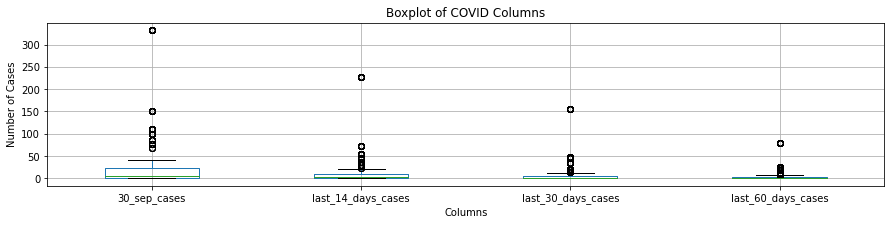

In [362]:
# Plot Boxplot of 4 selected attributes to see their distribution
lm_df.boxplot(figsize = (15,3))
plt.title('Boxplot of COVID Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Cases')

Plot histrogram of 4 selected attributes to see their distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82ba2497d0>,
      dtype=object)

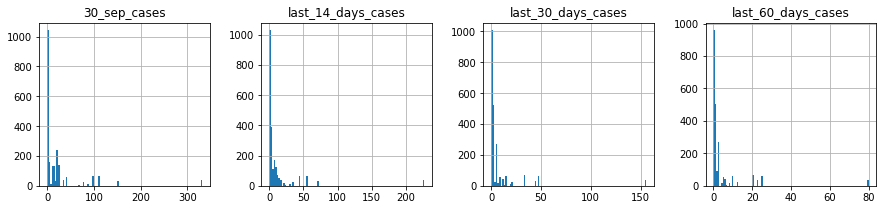

In [363]:
# PLot histrogram of 4 selected attributes to see their distribution
lm_df.hist(layout=(1,4),figsize = (15,3),bins = 100)


Plot scatterplot of 4 attributes to see how each attribute relates to each other

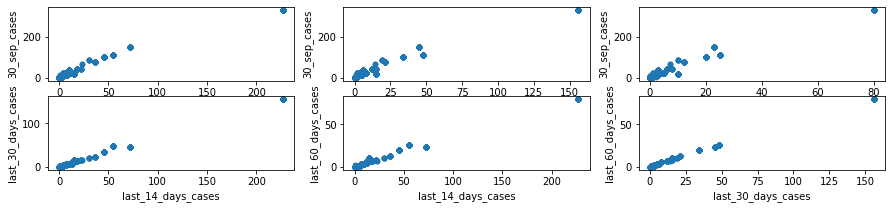

In [364]:
# Plot scatterplot of 4 attributes to see how each attribute relates to each other
fig, axes = plt.subplots(nrows=2, ncols=3,figsize = (15,3),)
lm_df.plot.scatter(x= 'last_14_days_cases',y = '30_sep_cases',ax=axes[0,0])
lm_df.plot.scatter(x= 'last_30_days_cases',y = '30_sep_cases',ax=axes[0,1])
lm_df.plot.scatter(x= 'last_60_days_cases',y = '30_sep_cases',ax=axes[0,2])

lm_df.plot.scatter(x= 'last_14_days_cases',y = 'last_30_days_cases',ax=axes[1,0])
lm_df.plot.scatter(x= 'last_14_days_cases',y = 'last_60_days_cases',ax=axes[1,1])
lm_df.plot.scatter(x= 'last_30_days_cases',y = 'last_60_days_cases',ax=axes[1,2])

Key Takeaway from EDA

- 30_sep_cases distribution was more scatter compared to last_14_days_cases and it became more dense when the window size increased (The most dense was at last_60_days_cases)

- Normalising data can potentially play a role to help these columns comparable in linear regression model

- All attributes had right-skewed distribution, we will try to do some trasformation later on

- From the scatterplot, all pairs of data showed linear relationship with one possible outlier. 

- They seemed to have linear relationship between target variable and features

- However, features showed relationship among themselve. This will potentially lead to multicolinearity problem, once we develop linear model

## 2.Data Transformation



In this section, we will study effect of different transformations. The effects that we want to look at are effect on distribution and relationship of features to target variables. The subtask is divided into 

2.1 Adjusted Log Transformation

2.2 Cube Root Transformation

2.3 Adjusted Box-Cox Transformation

2.4 Power Transformation

2.5 Visualisation on Distributions

2.6 Visualisation on relationships

source : https://www.listendata.com/2015/09/regression-transform-negative-values.html

### 2.1 Adjusted Log Transformation

We will do log transformation in this part. However, there are some zero values on attributes, which are not applicable on log transformation. To solve this probelm, we add some constant (1) when doing log transformation mentioned in the following link.

https://discuss.analyticsvidhya.com/t/methods-to-deal-with-zero-values-while-performing-log-transformation-of-variable/2431/2
https://blogs.sas.com/content/iml/2011/04/27/log-transformations-how-to-handle-negative-data-values.html

The following code adds new columns with adjusted log transtormation to lm_df

In [365]:
# Add new columns that apply log transformation

lm_df['log_30_sep_cases']= np.log(lm_df["30_sep_cases"]+1)
lm_df['log_last_14_days_cases']= np.log(lm_df["last_14_days_cases"]+1)
lm_df['log_last_30_days_cases'] = np.log(lm_df["last_30_days_cases"]+1)
lm_df['log_last_60_days_cases'] = np.log(lm_df["last_60_days_cases"]+1)

### 2.2 Cube Root Transformation

The following code adds new columns with cube root transtormation to lm_df

In [366]:
# Add new columns that apply  Cube Root transformation
lm_df['cuberoot_30_sep_cases']= np.power(lm_df["30_sep_cases"],1/3)
lm_df['cuberoot_last_14_days_cases']= np.power(lm_df["last_14_days_cases"],1/3)
lm_df['cuberoot_last_30_days_cases']= np.power(lm_df["last_30_days_cases"],1/3)
lm_df['cuberoot_last_60_days_cases']= np.power(lm_df["last_60_days_cases"],1/3)


###2.3 Adjusted Box-cox Transformation

We will do box-cox transformation in this part. However, there are some zero values on attributes, which are not applicable on box-cox transformation. To solve this probelm, we add some constant (0.00001) when doing box-cox transformation mentioned in the following link

https://data.princeton.edu/wws509/notes/c2s10

The following code use PowerTransformer from sckit leanrn library to fit and transform the data and adds new columns with Adjusted Box-cox Transformation to lm_df

In [367]:
# Fit box-cox Transformer to COVID data 
boxcox = PowerTransformer(method ='box-cox').fit(lm_df[['30_sep_cases','last_14_days_cases','last_30_days_cases','last_60_days_cases']]+0.00001)

# Adjusted all value
# Transform on lm_df
df_boxcox = boxcox.transform(lm_df[['30_sep_cases','last_14_days_cases','last_30_days_cases','last_60_days_cases']]+0.00001)

lm_df['boxcox_30_sep_cases']= df_boxcox[:,0]
lm_df['boxcox_last_14_days_cases']= df_boxcox[:,1]
lm_df['boxcox_last_30_days_cases'] = df_boxcox[:,2]
lm_df['boxcox_last_60_days_cases'] = df_boxcox[:,3]

### 2.4 Power Transformation (Yeo-Johnson)

The following code use PowerTransformer from sckit leanrn library to fit and transform the data and adds new columns with  Power Transformation to lm_df

In [368]:
# Fit Power Transformatior (yeo_Johnson) to COVID data after min-max scaling
power = PowerTransformer(method ='yeo-johnson').fit(lm_df[['30_sep_cases','last_14_days_cases','last_30_days_cases','last_60_days_cases']])

# Transform on lm_df
df_power = power.transform(lm_df[['30_sep_cases','last_14_days_cases','last_30_days_cases','last_60_days_cases']])

lm_df['power_30_sep_cases']= df_power[:,0]
lm_df['power_last_14_days_cases']= df_power[:,1]
lm_df['power_last_30_days_cases'] = df_power[:,2]
lm_df['power_last_60_days_cases'] = df_power[:,3]

### 2.5 Visualisation on Distributions

After we do several transformation, we will plot histrogram and see how distributions look like in each transformation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82c06954d0>,
      dtype=object)

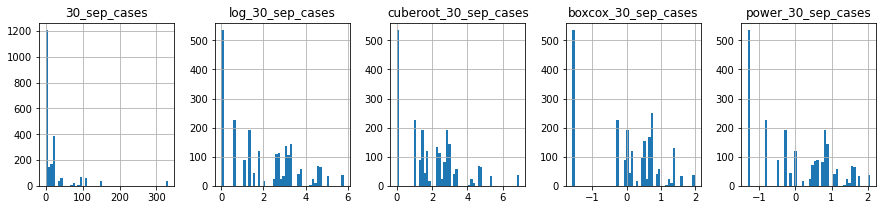

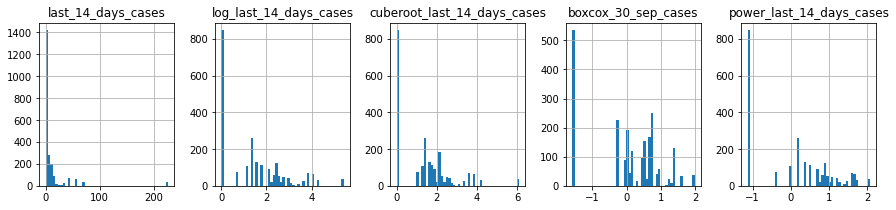

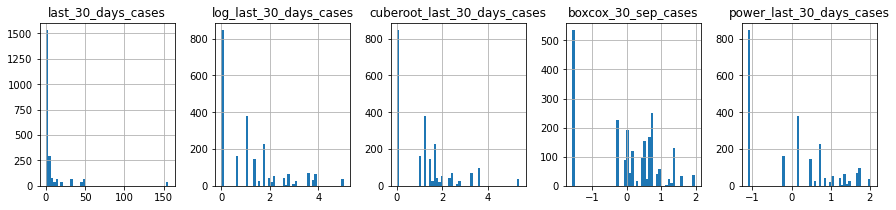

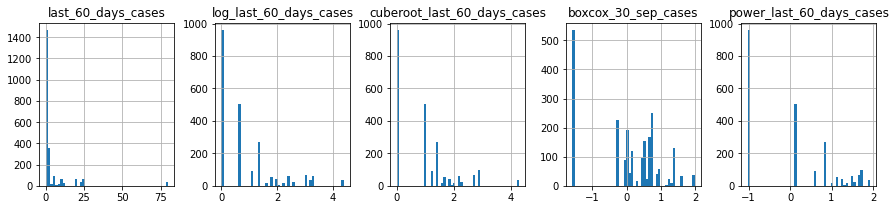

In [369]:
# Plot histogram to see data distribution
lm_df[['30_sep_cases','log_30_sep_cases','cuberoot_30_sep_cases','boxcox_30_sep_cases','power_30_sep_cases']].hist(layout=(1,5),figsize = (15,3),bins = 50)
lm_df[['last_14_days_cases','log_last_14_days_cases','cuberoot_last_14_days_cases','boxcox_30_sep_cases','power_last_14_days_cases']].hist(layout=(1,5),figsize = (15,3),bins = 50)
lm_df[['last_30_days_cases','log_last_30_days_cases','cuberoot_last_30_days_cases','boxcox_30_sep_cases','power_last_30_days_cases']].hist(layout=(1,5),figsize = (15,3),bins = 50)
lm_df[['last_60_days_cases','log_last_60_days_cases','cuberoot_last_60_days_cases','boxcox_30_sep_cases','power_last_60_days_cases']].hist(layout=(1,5),figsize = (15,3),bins = 50)

Effect on Distribution After Data Transformation

- After applying some transformation, we can observe that distriubtion of the data seems to be less skewed. However, the data is still heavily skewed where values are equal to zero and the shape of the distribution is still not normal

### 2.6 Visualisation on relationships

Next, we will plot scatterplot of each transformation to see how relationships of target variable and features look like

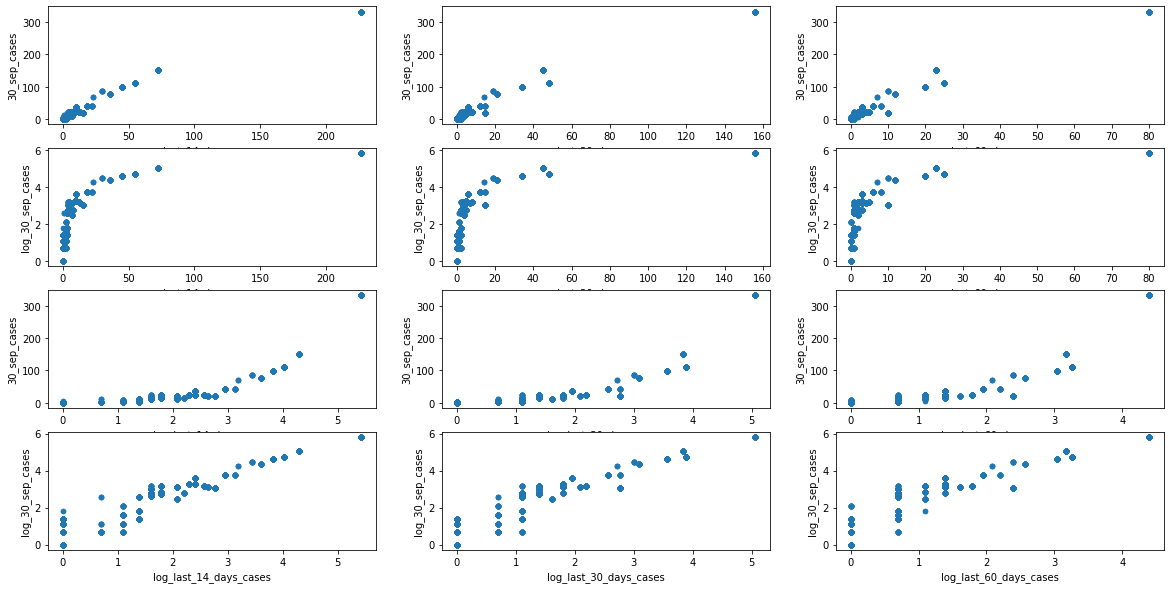

In [370]:
# Plot scatterplots to see relationship after log transformation

fig, axes = plt.subplots(nrows=4, ncols=3,figsize = (20,10))

lm_df.plot.scatter(x= 'last_14_days_cases',y = '30_sep_cases',ax=axes[0,0])
lm_df.plot.scatter(x= 'last_30_days_cases',y = '30_sep_cases',ax=axes[0,1])
lm_df.plot.scatter(x= 'last_60_days_cases',y = '30_sep_cases',ax=axes[0,2])


lm_df.plot.scatter(x= 'last_14_days_cases',y = 'log_30_sep_cases',ax=axes[1,0])
lm_df.plot.scatter(x= 'last_30_days_cases',y = 'log_30_sep_cases',ax=axes[1,1])
lm_df.plot.scatter(x= 'last_60_days_cases',y = 'log_30_sep_cases',ax=axes[1,2])


lm_df.plot.scatter(x= 'log_last_14_days_cases',y = '30_sep_cases',ax=axes[2,0])
lm_df.plot.scatter(x= 'log_last_30_days_cases',y = '30_sep_cases',ax=axes[2,1])
lm_df.plot.scatter(x= 'log_last_60_days_cases',y = '30_sep_cases',ax=axes[2,2])


lm_df.plot.scatter(x= 'log_last_14_days_cases',y = 'log_30_sep_cases',ax=axes[3,0])
lm_df.plot.scatter(x= 'log_last_30_days_cases',y = 'log_30_sep_cases',ax=axes[3,1])
lm_df.plot.scatter(x= 'log_last_60_days_cases',y = 'log_30_sep_cases',ax=axes[3,2])


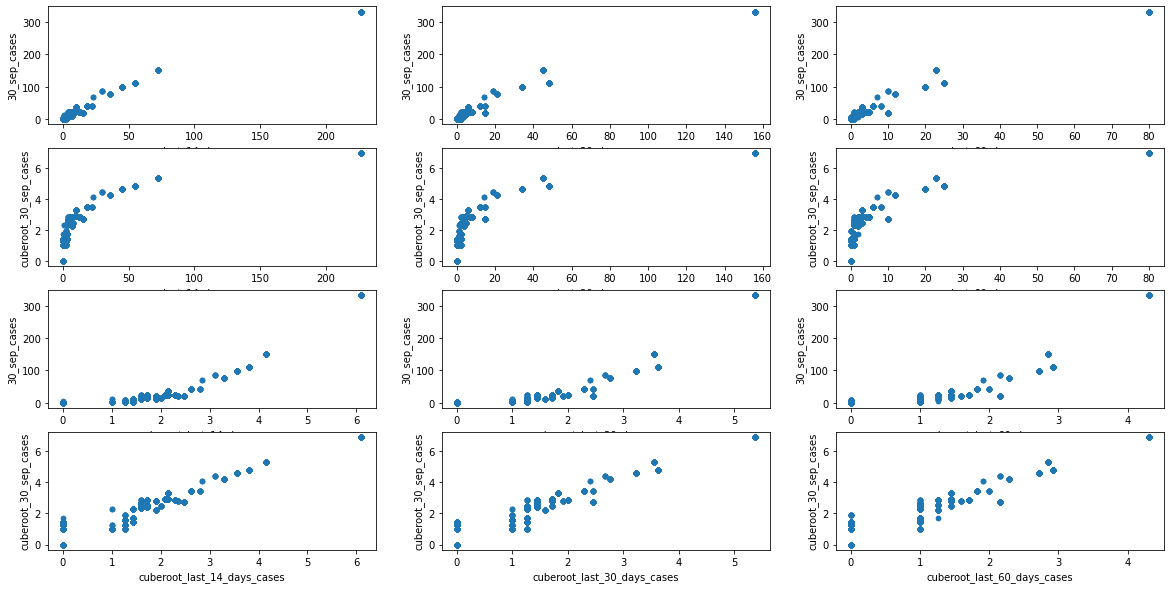

In [371]:
# Plot scatterplots to see relationship after cuberoot transformation 
fig, axes = plt.subplots(nrows=4, ncols=3,figsize = (20,10))

lm_df.plot.scatter(x= 'last_14_days_cases',y = '30_sep_cases',ax=axes[0,0])
lm_df.plot.scatter(x= 'last_30_days_cases',y = '30_sep_cases',ax=axes[0,1])
lm_df.plot.scatter(x= 'last_60_days_cases',y = '30_sep_cases',ax=axes[0,2])


lm_df.plot.scatter(x= 'last_14_days_cases',y = 'cuberoot_30_sep_cases',ax=axes[1,0])
lm_df.plot.scatter(x= 'last_30_days_cases',y = 'cuberoot_30_sep_cases',ax=axes[1,1])
lm_df.plot.scatter(x= 'last_60_days_cases',y = 'cuberoot_30_sep_cases',ax=axes[1,2])


lm_df.plot.scatter(x= 'cuberoot_last_14_days_cases',y = '30_sep_cases',ax=axes[2,0])
lm_df.plot.scatter(x= 'cuberoot_last_30_days_cases',y = '30_sep_cases',ax=axes[2,1])
lm_df.plot.scatter(x= 'cuberoot_last_60_days_cases',y = '30_sep_cases',ax=axes[2,2])


lm_df.plot.scatter(x= 'cuberoot_last_14_days_cases',y = 'cuberoot_30_sep_cases',ax=axes[3,0])
lm_df.plot.scatter(x= 'cuberoot_last_30_days_cases',y = 'cuberoot_30_sep_cases',ax=axes[3,1])
lm_df.plot.scatter(x= 'cuberoot_last_60_days_cases',y = 'cuberoot_30_sep_cases',ax=axes[3,2])


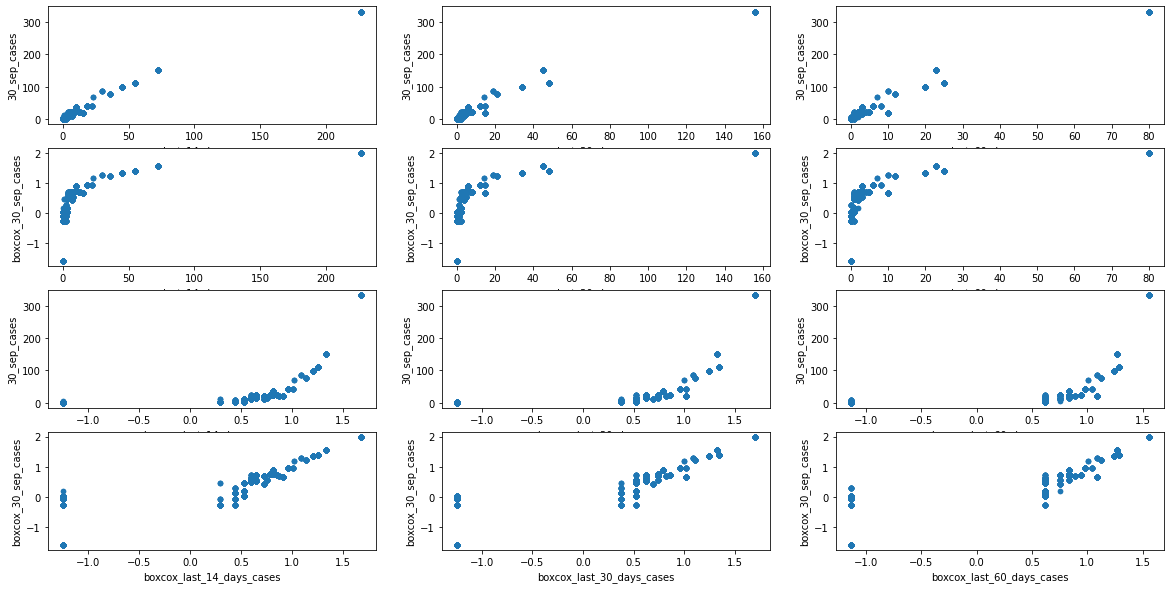

In [372]:
# Plot scatterplots to see relationship after boxcox transformation 
fig, axes = plt.subplots(nrows=4, ncols=3,figsize = (20,10))

lm_df.plot.scatter(x= 'last_14_days_cases',y = '30_sep_cases',ax=axes[0,0])
lm_df.plot.scatter(x= 'last_30_days_cases',y = '30_sep_cases',ax=axes[0,1])
lm_df.plot.scatter(x= 'last_60_days_cases',y = '30_sep_cases',ax=axes[0,2])


lm_df.plot.scatter(x= 'last_14_days_cases',y = 'boxcox_30_sep_cases',ax=axes[1,0])
lm_df.plot.scatter(x= 'last_30_days_cases',y = 'boxcox_30_sep_cases',ax=axes[1,1])
lm_df.plot.scatter(x= 'last_60_days_cases',y = 'boxcox_30_sep_cases',ax=axes[1,2])


lm_df.plot.scatter(x= 'boxcox_last_14_days_cases',y = '30_sep_cases',ax=axes[2,0])
lm_df.plot.scatter(x= 'boxcox_last_30_days_cases',y = '30_sep_cases',ax=axes[2,1])
lm_df.plot.scatter(x= 'boxcox_last_60_days_cases',y = '30_sep_cases',ax=axes[2,2])


lm_df.plot.scatter(x= 'boxcox_last_14_days_cases',y = 'boxcox_30_sep_cases',ax=axes[3,0])
lm_df.plot.scatter(x= 'boxcox_last_30_days_cases',y = 'boxcox_30_sep_cases',ax=axes[3,1])
lm_df.plot.scatter(x= 'boxcox_last_60_days_cases',y = 'boxcox_30_sep_cases',ax=axes[3,2])

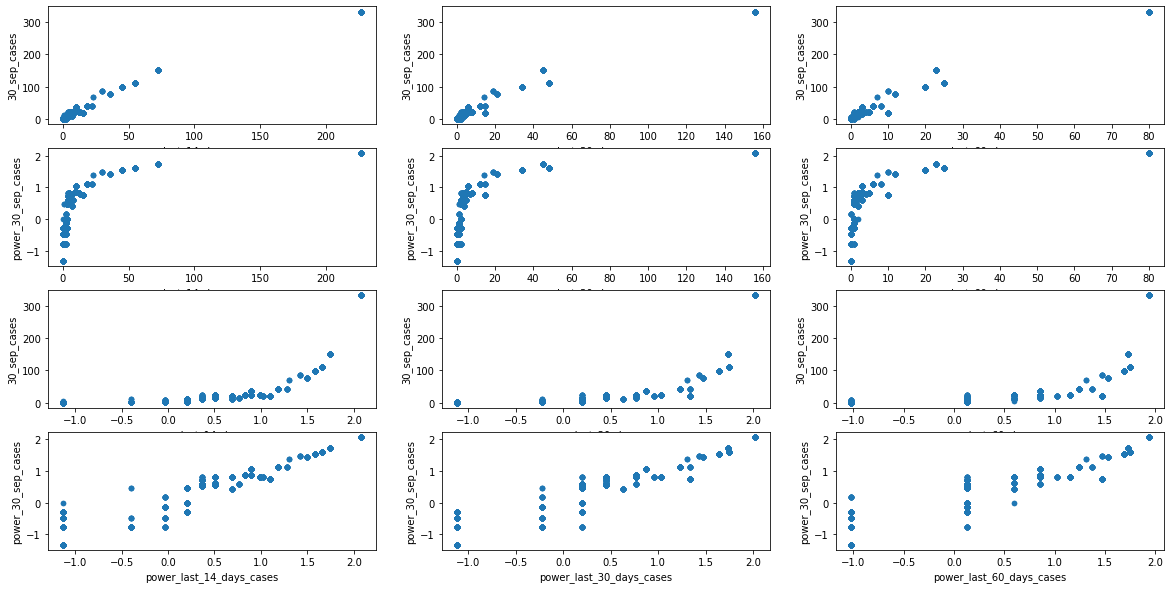

In [373]:
# Plot scatterplots to see relationship after power transformation 
fig, axes = plt.subplots(nrows=4, ncols=3,figsize = (20,10))

lm_df.plot.scatter(x= 'last_14_days_cases',y = '30_sep_cases',ax=axes[0,0])
lm_df.plot.scatter(x= 'last_30_days_cases',y = '30_sep_cases',ax=axes[0,1])
lm_df.plot.scatter(x= 'last_60_days_cases',y = '30_sep_cases',ax=axes[0,2])


lm_df.plot.scatter(x= 'last_14_days_cases',y = 'power_30_sep_cases',ax=axes[1,0])
lm_df.plot.scatter(x= 'last_30_days_cases',y = 'power_30_sep_cases',ax=axes[1,1])
lm_df.plot.scatter(x= 'last_60_days_cases',y = 'power_30_sep_cases',ax=axes[1,2])


lm_df.plot.scatter(x= 'power_last_14_days_cases',y = '30_sep_cases',ax=axes[2,0])
lm_df.plot.scatter(x= 'power_last_30_days_cases',y = '30_sep_cases',ax=axes[2,1])
lm_df.plot.scatter(x= 'power_last_60_days_cases',y = '30_sep_cases',ax=axes[2,2])


lm_df.plot.scatter(x= 'power_last_14_days_cases',y = 'power_30_sep_cases',ax=axes[3,0])
lm_df.plot.scatter(x= 'power_last_30_days_cases',y = 'power_30_sep_cases',ax=axes[3,1])
lm_df.plot.scatter(x= 'power_last_60_days_cases',y = 'power_30_sep_cases',ax=axes[3,2])

Effect on Relationship After Data Transformation

- Before transforming the data, it can be observed that last_X_days_cases features have some linear relationship with the target variable (30_sep_cases). However, there are some possible outlier in the original data.

- Then, we tried several transformations mentioned above and we found that linear relationship occured when transforming both target variable and feautures in all transformations.

- We will fit the linear model with/without transformation of pairs that we see potential linear relationships observed from the plot in this part in the later section (section 4) to measure goodness of fit and select the best model to see whether transformation is necessary or not and if it is, which one is the most appropriate one

## 3.Data Normalisation

In this section, we will study effect of different normalisations. The subtask is divided into

3.1 Standardisation (Z-score)

3.2 MinMax Normalisation

3.3 Visualisation for Data Distrubtion After Normalisation

### 3.1 Standardisation (Z-score)

We will use preprocessing.StandardScaler() from sckit learn library to standardised all attributes and add to new dataframe std_lm_df

In [374]:
# Fit the standardisation on lm_df
std_scale = preprocessing.StandardScaler().fit(lm_df)

# Transform on lm_df
df_std = std_scale.transform(lm_df) 

std_lm_df= pd.DataFrame()

# Add standardised column to lm_df
std_lm_df['std_30_sep_cases'] = df_std[:,0]
std_lm_df['std_last_14_days_cases'] = df_std[:,1]
std_lm_df['std_last_30_days_cases'] = df_std[:,2]
std_lm_df['std_last_60_days_cases'] = df_std[:,3]

std_lm_df['std_log_30_sep_cases'] = df_std[:,4]
std_lm_df['std_log_last_14_days_cases'] = df_std[:,5]
std_lm_df['std_log_last_30_days_cases'] = df_std[:,6]
std_lm_df['std_log_last_60_days_cases'] = df_std[:,7]

std_lm_df['std_cuberoot_30_sep_cases'] = df_std[:,8]
std_lm_df['std_cuberoot_last_14_days_cases'] = df_std[:,9]
std_lm_df['std_cuberoot_last_30_days_cases'] = df_std[:,10]
std_lm_df['std_cuberoot_last_60_days_cases'] = df_std[:,11]

std_lm_df['std_boxcox_30_sep_cases'] = df_std[:,12]
std_lm_df['std_boxcox_last_14_days_cases'] = df_std[:,13]
std_lm_df['std_boxcox_last_30_days_cases'] = df_std[:,14]
std_lm_df['std_boxcox_last_60_days_cases'] = df_std[:,15]

std_lm_df['std_power_30_sep_cases'] = df_std[:,16]
std_lm_df['std_power_last_14_days_cases'] = df_std[:,17]
std_lm_df['std_power_last_30_days_cases'] = df_std[:,18]
std_lm_df['std_power_last_60_days_cases'] = df_std[:,19]




### 3.2 MinMax Normalisation

We will use preprocessing.MinMaxScaler() from sckit learn library to do MinMax normalisation all attributes and add to new dataframe minmax_lm_df


In [375]:
# Fit the MinMax Normalisation on lm_df
minmax_scale = preprocessing.MinMaxScaler().fit(lm_df)

# Transform on lm_df
df_minmax = minmax_scale.transform(lm_df)

minmax_lm_df = pd.DataFrame()

# Add minmax column to lm_df
minmax_lm_df['minmax_30_sep_cases'] = df_minmax[:,0]
minmax_lm_df['minmax_last_14_days_cases'] = df_minmax[:,1]
minmax_lm_df['minmax_last_30_days_cases'] = df_minmax[:,2]
minmax_lm_df['minmax_last_60_days_cases'] = df_minmax[:,3]

minmax_lm_df['minmax_log_30_sep_cases'] = df_minmax[:,4]
minmax_lm_df['minmax_log_last_14_days_cases'] = df_minmax[:,5]
minmax_lm_df['minmax_log_last_30_days_cases'] = df_minmax[:,6]
minmax_lm_df['minmax_log_last_60_days_cases'] = df_minmax[:,7]

minmax_lm_df['minmax_cuberoot_30_sep_cases'] = df_minmax[:,8]
minmax_lm_df['minmax_cuberoot_last_14_days_cases'] = df_minmax[:,9]
minmax_lm_df['minmax_cuberoot_last_30_days_cases'] = df_minmax[:,10]
minmax_lm_df['minmax_cuberoot_last_60_days_cases'] = df_minmax[:,11]

minmax_lm_df['minmax_boxcox_30_sep_cases'] = df_minmax[:,12]
minmax_lm_df['minmax_boxcox_last_14_days_cases'] = df_minmax[:,13]
minmax_lm_df['minmax_boxcox_last_30_days_cases'] = df_minmax[:,14]
minmax_lm_df['minmax_boxcox_last_60_days_cases'] = df_minmax[:,15]

minmax_lm_df['minmax_power_30_sep_cases'] = df_minmax[:,16]
minmax_lm_df['minmax_power_last_14_days_cases'] = df_minmax[:,17]
minmax_lm_df['minmax_power_last_30_days_cases'] = df_minmax[:,18]
minmax_lm_df['minmax_power_last_60_days_cases'] = df_minmax[:,19]


### 3.3 Visualisation for Data Distrubtion After Normalisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82bc07cf90>,
      dtype=object)

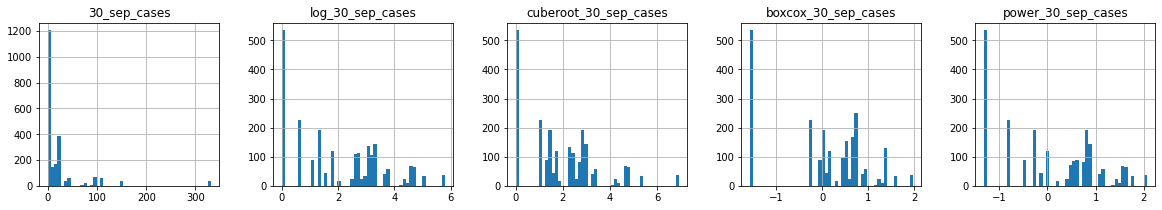

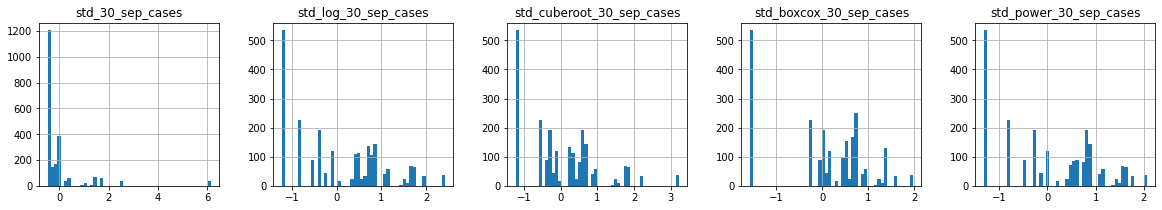

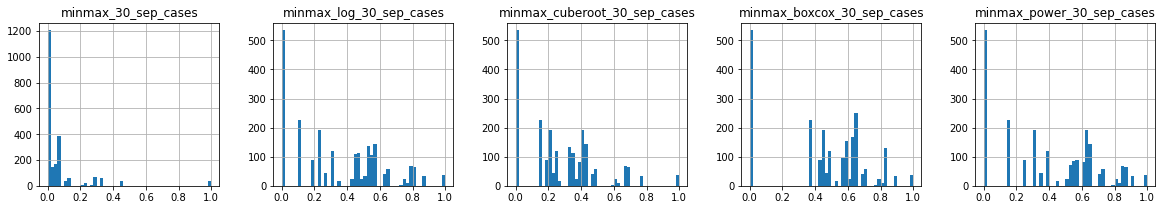

In [376]:
# Plot of histogram for 30_sep_cases with their transformation, standardised and minmax scaling of them

lm_df[['30_sep_cases','log_30_sep_cases','cuberoot_30_sep_cases','boxcox_30_sep_cases','power_30_sep_cases']].hist(layout=(1,5),figsize = (20,3),bins = 50)
std_lm_df[['std_30_sep_cases','std_log_30_sep_cases','std_cuberoot_30_sep_cases','std_boxcox_30_sep_cases','std_power_30_sep_cases']].hist(layout=(1,5),figsize = (20,3),bins = 50)
minmax_lm_df[['minmax_30_sep_cases','minmax_log_30_sep_cases','minmax_cuberoot_30_sep_cases','minmax_boxcox_30_sep_cases','minmax_power_30_sep_cases']].hist(layout=(1,5),figsize = (20,3),bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82bc0547d0>,
      dtype=object)

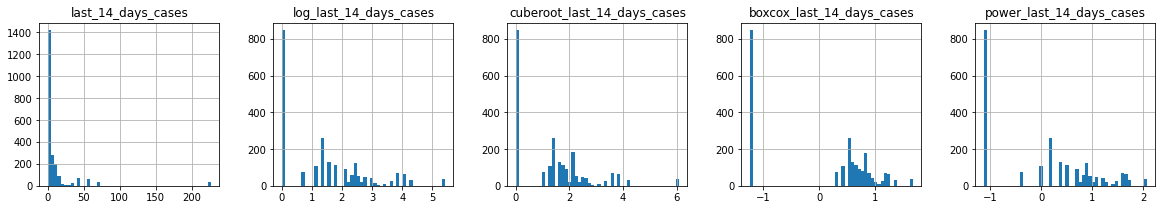

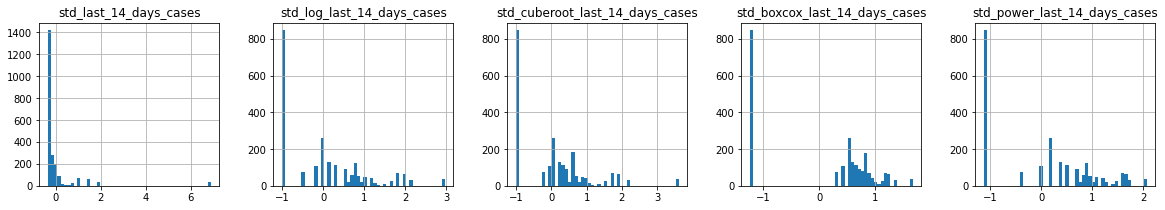

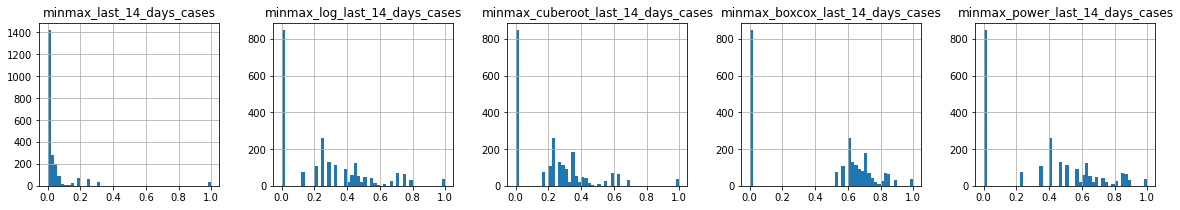

In [377]:
# Plot of histogram for last_14_days_cases with their transformation, standardised and minmax scaling of them

lm_df[['last_14_days_cases','log_last_14_days_cases','cuberoot_last_14_days_cases','boxcox_last_14_days_cases','power_last_14_days_cases']].hist(layout=(1,5),figsize = (20,3),bins = 50)
std_lm_df[['std_last_14_days_cases','std_log_last_14_days_cases','std_cuberoot_last_14_days_cases','std_boxcox_last_14_days_cases','std_power_last_14_days_cases']].hist(layout=(1,5),figsize = (20,3),bins = 50)
minmax_lm_df[['minmax_last_14_days_cases','minmax_log_last_14_days_cases','minmax_cuberoot_last_14_days_cases','minmax_boxcox_last_14_days_cases','minmax_power_last_14_days_cases']].hist(layout=(1,5),figsize = (20,3),bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82b9cfc510>,
      dtype=object)

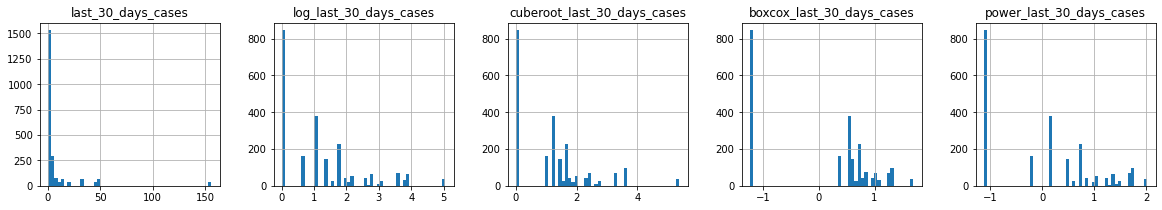

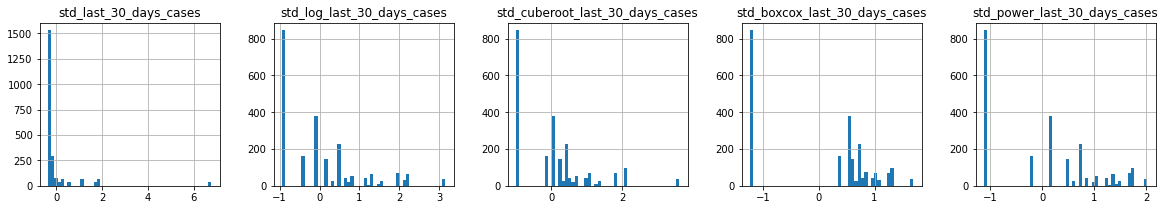

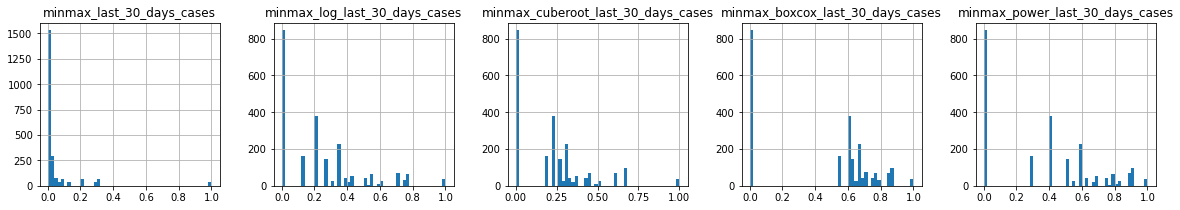

In [378]:
# Plot of histogram for last_30_days_cases with their transformation, standardised and minmax scaling of them

lm_df[['last_30_days_cases','log_last_30_days_cases','cuberoot_last_30_days_cases','boxcox_last_30_days_cases','power_last_30_days_cases']].hist(layout=(1,5),figsize = (20,3),bins = 50)
std_lm_df[['std_last_30_days_cases','std_log_last_30_days_cases','std_cuberoot_last_30_days_cases','std_boxcox_last_30_days_cases','std_power_last_30_days_cases']].hist(layout=(1,5),figsize = (20,3),bins = 50)
minmax_lm_df[['minmax_last_30_days_cases','minmax_log_last_30_days_cases','minmax_cuberoot_last_30_days_cases','minmax_boxcox_last_30_days_cases','minmax_power_last_30_days_cases']].hist(layout=(1,5),figsize = (20,3),bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82b92b1f10>,
      dtype=object)

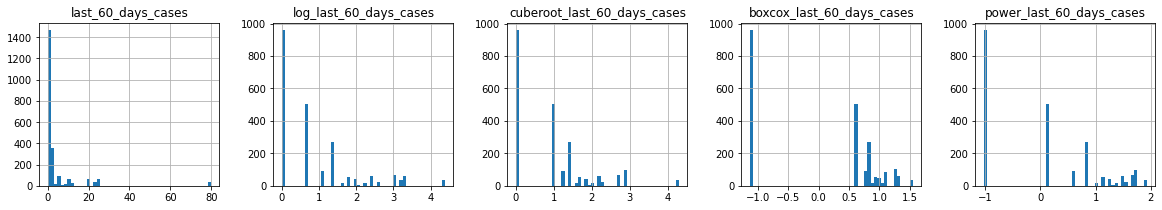

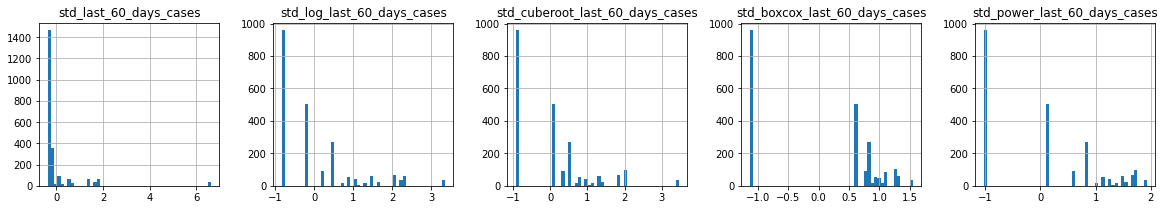

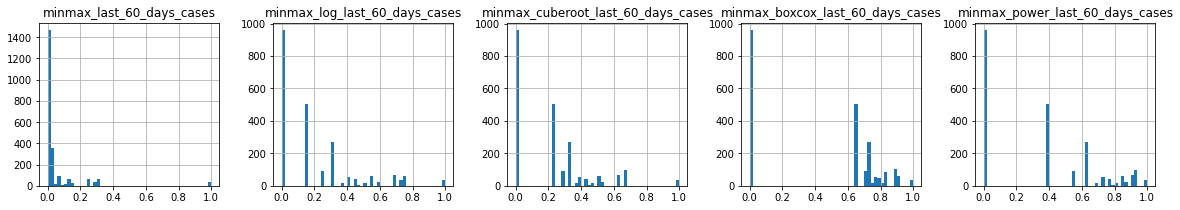

In [379]:
# Plot of histogram for last_60_days_cases with their transformation, standardised and minmax scaling of them

lm_df[['last_60_days_cases','log_last_60_days_cases','cuberoot_last_60_days_cases','boxcox_last_60_days_cases','power_last_60_days_cases']].hist(layout=(1,5),figsize = (20,3),bins = 50)
std_lm_df[['std_last_60_days_cases','std_log_last_60_days_cases','std_cuberoot_last_60_days_cases','std_boxcox_last_60_days_cases','std_power_last_60_days_cases']].hist(layout=(1,5),figsize = (20,3),bins = 50)
minmax_lm_df[['minmax_last_60_days_cases','minmax_log_last_60_days_cases','minmax_cuberoot_last_60_days_cases','minmax_boxcox_last_60_days_cases','minmax_power_last_60_days_cases']].hist(layout=(1,5),figsize = (20,3),bins = 50)

Effect on Normalisation

- After we plot several histogram to compare the shape of distribution before and after normalisation (standardisation and minmax scaling), we found the shape remains approximately the same.

- The data after standardised demonstrated the same distribution shape, but have mean = 0 and variance =1

- While the minmax scaling rescale values to specific range (0-1 in this case)


## 4.Model Evaluation

In the previous sections, we already studied effect on distributions and relationships after data transformation and normalisation. Now, we want to fit linear models with different transformations and look at the model performance (R square and MSE) to see whether transformation is required in this task or not. On the normalisation part, there is requirement on the specification saying that "First, we want our features to be in the same scale ". Even though linear regression does not require normalisation, it is a good practice to do anyway, which can improve computation efficiency since it helps algorithm to converge faster. Also, normalisation before fitting linear regression can help us interpret the model with fair competition among features. In this case, we will use standardisation as a normalisation method. In this section, it is divided into :

4.1 Linear Model of Standardised Original Data

4.2 Linear Model of Standardised Data with Log Transformation

4.3 Linear Model of Standardised Data with Cube Root Transformation

4.4 Linear Model of Standardised Data with Box-cox Transformation

4.5 Linear Model of Standardised Data with Power Transformation

4.6 Linear Model of Standardised Original Data with Outlier Removal

4.7 Summary


### 4.1 Linear Model of Standardised Original Data

R-Square of the model without transformation is 0.9716
Mean Square Errors(MSE) of the model without transformation is 0.0397


,y_pred,y_test,residual
count,673.000000,673.000000,673.000000
mean,0.077335,0.076138,0.001197
std,1.197365,1.183593,0.199298
min,-0.395788,-0.468551,-0.710191
25%,-0.380552,-0.448573,-0.086607
50%,-0.288871,-0.368661,0.068021
75%,-0.061633,-0.009057,0.087999
max,6.757100,6.164133,0.592967


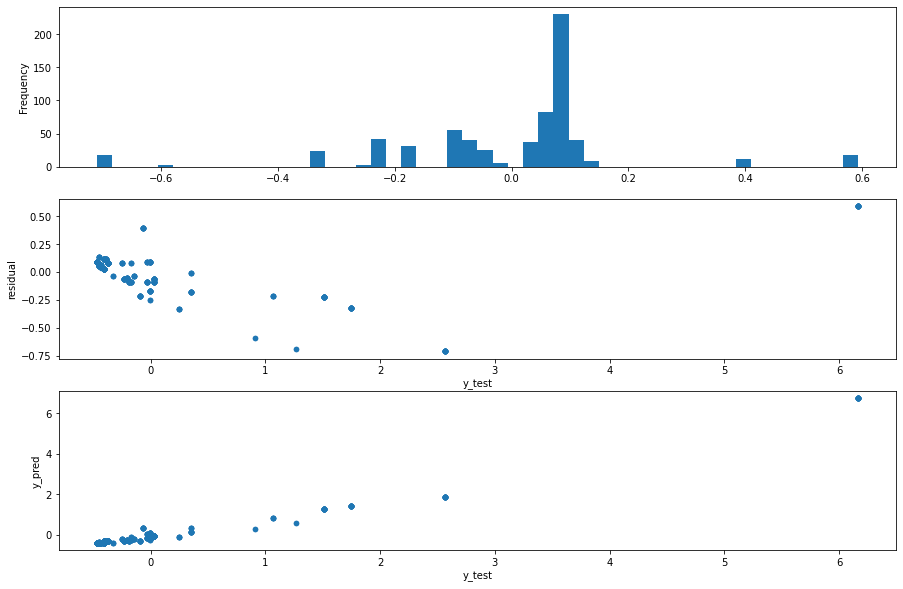

In [380]:
# Select features from std_lm_df
x = std_lm_df[['std_last_14_days_cases','std_last_30_days_cases','std_last_60_days_cases']]

# Select target variable from std_lm_df
y = std_lm_df['std_30_sep_cases']

# Split train and test data 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state =  123)

x_train.reset_index(drop = True,inplace = True)
x_test.reset_index(drop = True,inplace = True)
y_train.reset_index(drop = True,inplace = True)
y_test.reset_index(drop = True,inplace = True)
y_test.reset_index(drop = True,inplace = True)

# Fit linear regression on train data
lm = LinearRegression()
lm.fit(x_train,y_train)

# Use the model to predict on test data
y_pred = lm.predict(x_test)

# Calculate R-square on test data
print('R-Square of the model without transformation is '+str(round(r2_score(y_test,y_pred),4)))

# Calculate MSE  on test data
print('Mean Square Errors(MSE) of the model without transformation is '+str(round(mean_squared_error(y_test,y_pred),4)))

# Create residual dataframe used for ploting
residual_df = pd.DataFrame()
residual_df['y_pred']= y_pred
residual_df['y_test']= y_test
residual_df['residual'] = y_pred-y_test

# Plot 3 graphs to check linear model assumption
fig, axes = plt.subplots(nrows=3, ncols=1,figsize = (15,10))
residual_df['residual'].plot.hist(bins = 50,ax=axes[0])
residual_df.plot.scatter(x='y_test', y= 'residual',ax=axes[1])
residual_df.plot.scatter(x='y_test', y= 'y_pred',ax=axes[2]) 

# residual stat
residual_df.describe()

### 4.2 Linear Model of Standardised Data with Log Transformation

R-Square of the model with log transformation is 0.9264
Mean Square Errors(MSE) of the model with log  transformation is 0.0792


,y_pred,y_test,residual
count,673.000000,673.000000,673.000000
mean,0.037072,0.019737,0.017335
std,1.004002,1.038087,0.281052
min,-0.992556,-1.236686,-0.631457
25%,-0.992556,-0.798893,-0.193663
50%,0.042128,-0.105006,0.094916
75%,0.776145,0.770581,0.244130
max,2.726540,2.431752,0.483542


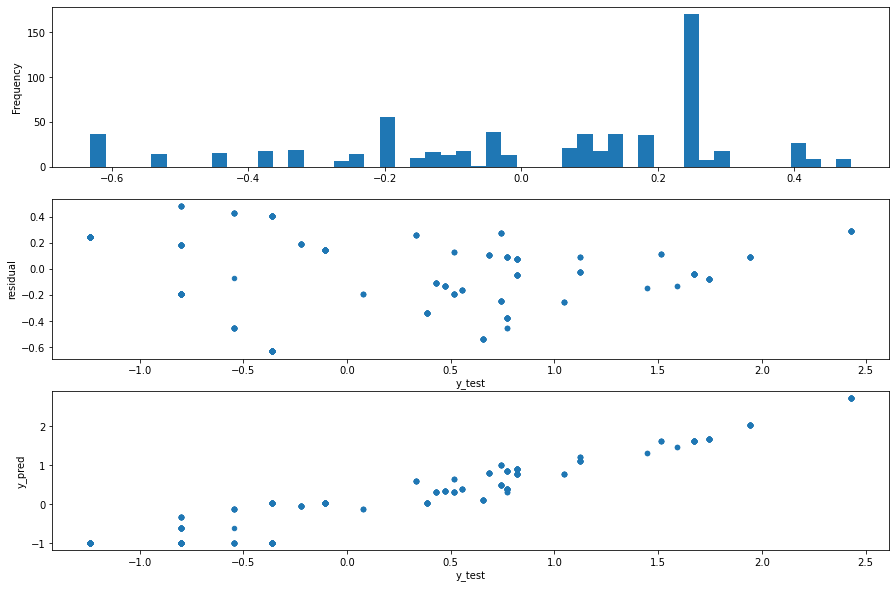

In [381]:
# Select features from std_lm_df
x = std_lm_df[['std_log_last_14_days_cases','std_log_last_30_days_cases','std_log_last_60_days_cases']]

# Select target variable from std_lm_df
y = std_lm_df['std_log_30_sep_cases']

# Split train and test data 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state =  123)

x_train.reset_index(drop = True,inplace = True)
x_test.reset_index(drop = True,inplace = True)
y_train.reset_index(drop = True,inplace = True)
y_test.reset_index(drop = True,inplace = True)
y_test.reset_index(drop = True,inplace = True)

# Fit linear regression on train data
lm = LinearRegression()
lm.fit(x_train,y_train)

# Use the model to predict on test data
y_pred = lm.predict(x_test)

# Calculate R-square on test data
print('R-Square of the model with log transformation is '+str(round(r2_score(y_test,y_pred),4)))

# Calculate MSE  on test data
print('Mean Square Errors(MSE) of the model with log  transformation is '+str(round(mean_squared_error(y_test,y_pred),4)))

# Create residual dataframe used for ploting
residual_df = pd.DataFrame()
residual_df['y_pred']= y_pred
residual_df['y_test']= y_test
residual_df['residual'] = y_pred-y_test

# Plot 3 graphs to check linear model assumption
fig, axes = plt.subplots(nrows=3, ncols=1,figsize = (15,10))
residual_df['residual'].plot.hist(bins = 50,ax=axes[0])
residual_df.plot.scatter(x='y_test', y= 'residual',ax=axes[1])
residual_df.plot.scatter(x='y_test', y= 'y_pred',ax=axes[2]) 

# residual stat
residual_df.describe()

### 4.3 Linear Model of Standardised Data with Cube Root Transfromation

R-Square of the model with log transformation is 0.9272
Mean Square Errors(MSE) of the model with log  transformation is 0.0823


,y_pred,y_test,residual
count,673.000000,673.000000,673.000000
mean,0.045568,0.032411,0.013157
std,1.023909,1.063879,0.286794
min,-0.956628,-1.229394,-0.656308
25%,-0.956628,-0.585210,-0.138290
50%,0.086293,-0.127855,0.084413
75%,0.599237,0.602579,0.272766
max,3.451939,3.231164,0.500392


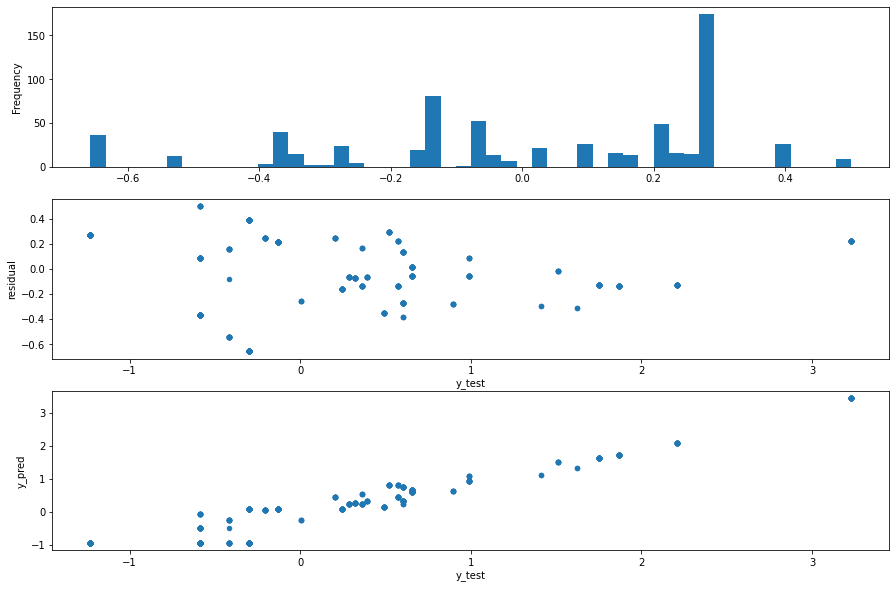

In [382]:
# Select features from std_lm_df
x = std_lm_df[['std_cuberoot_last_14_days_cases','std_cuberoot_last_30_days_cases','std_cuberoot_last_60_days_cases']]

# Select target variable from std_lm_df
y = std_lm_df['std_cuberoot_30_sep_cases']

# Split train and test data 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state =  123)

x_train.reset_index(drop = True,inplace = True)
x_test.reset_index(drop = True,inplace = True)
y_train.reset_index(drop = True,inplace = True)
y_test.reset_index(drop = True,inplace = True)
y_test.reset_index(drop = True,inplace = True)

# Fit linear regression on train data
lm = LinearRegression()
lm.fit(x_train,y_train)

# Use the model to predict on test data
y_pred = lm.predict(x_test)

# Calculate R-square on test data
print('R-Square of the model with log transformation is '+str(round(r2_score(y_test,y_pred),4)))

# Calculate MSE  on test data
print('Mean Square Errors(MSE) of the model with log  transformation is '+str(round(mean_squared_error(y_test,y_pred),4)))

# Create residual dataframe used for ploting
residual_df = pd.DataFrame()
residual_df['y_pred']= y_pred
residual_df['y_test']= y_test
residual_df['residual'] = y_pred-y_test

# Plot 3 graphs to check linear model assumption
fig, axes = plt.subplots(nrows=3, ncols=1,figsize = (15,10))
residual_df['residual'].plot.hist(bins = 50,ax=axes[0])
residual_df.plot.scatter(x='y_test', y= 'residual',ax=axes[1])
residual_df.plot.scatter(x='y_test', y= 'y_pred',ax=axes[2]) 

# residual stat
residual_df.describe()

### 4.4 Linear Model of Standardised Data with Box-cox Transformation

R-Square of the model with log transformation is 0.7855
Mean Square Errors(MSE) of the model with log  transformation is 0.2256


,y_pred,y_test,residual
count,673.000000,673.000000,673.000000
mean,0.018854,0.012768,0.006086
std,0.881512,1.026107,0.475240
min,-1.071793,-1.579335,-1.103565
25%,-1.071793,-0.256728,-0.247733
50%,0.490595,0.183021,0.019776
75%,0.693590,0.710591,0.507542
max,1.461654,1.981134,0.721348


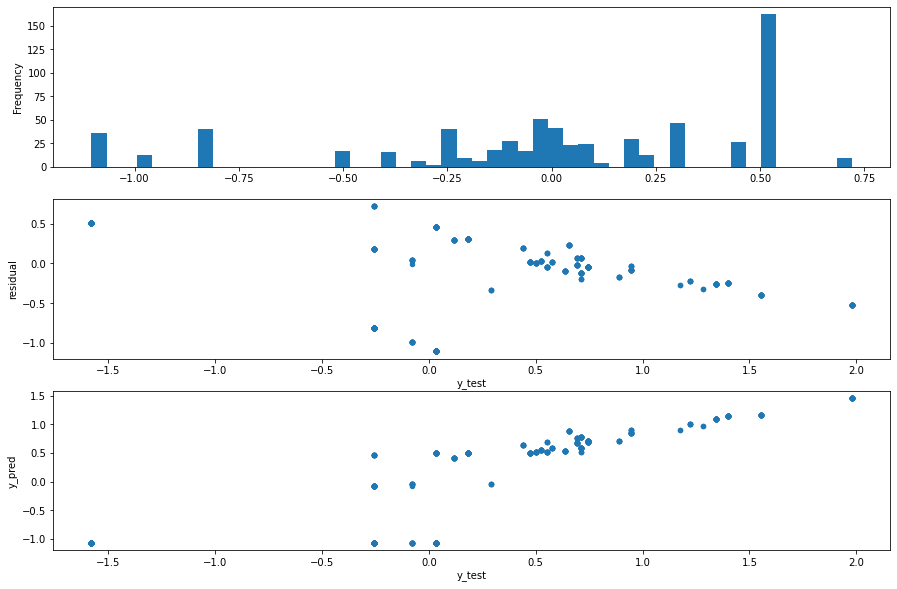

In [383]:
# Select features from std_lm_df
x = std_lm_df[['std_boxcox_last_14_days_cases','std_boxcox_last_30_days_cases','std_boxcox_last_60_days_cases']]

# Select target variable from std_lm_df
y = std_lm_df['std_boxcox_30_sep_cases']

# Split train and test data 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state =  123)

x_train.reset_index(drop = True,inplace = True)
x_test.reset_index(drop = True,inplace = True)
y_train.reset_index(drop = True,inplace = True)
y_test.reset_index(drop = True,inplace = True)
y_test.reset_index(drop = True,inplace = True)

# Fit linear regression on train data
lm = LinearRegression()
lm.fit(x_train,y_train)

# Use the model to predict on test data
y_pred = lm.predict(x_test)

# Calculate R-square on test data
print('R-Square of the model with log transformation is '+str(round(r2_score(y_test,y_pred),4)))

# Calculate MSE  on test data
print('Mean Square Errors(MSE) of the model with log  transformation is '+str(round(mean_squared_error(y_test,y_pred),4)))

# Create residual dataframe used for ploting
residual_df = pd.DataFrame()
residual_df['y_pred']= y_pred
residual_df['y_test']= y_test
residual_df['residual'] = y_pred-y_test

# Plot 3 graphs to check linear model assumption
fig, axes = plt.subplots(nrows=3, ncols=1,figsize = (15,10))
residual_df['residual'].plot.hist(bins = 50,ax=axes[0])
residual_df.plot.scatter(x='y_test', y= 'residual',ax=axes[1])
residual_df.plot.scatter(x='y_test', y= 'y_pred',ax=axes[2]) 

# residual stat
residual_df.describe()

### 4.5 Linear Model of Standardised Data with Power Transformation

R-Square of the model with log transformation is 0.9096
Mean Square Errors(MSE) of the model with log  transformation is 0.0953


,y_pred,y_test,residual
count,673.000000,673.000000,673.000000
mean,0.023916,0.013606,0.010310
std,0.966702,1.027786,0.308814
min,-1.046678,-1.320981,-0.762406
25%,-1.046678,-0.781007,-0.155036
50%,0.175977,-0.012350,0.045538
75%,0.841678,0.823172,0.274303
max,1.972429,2.071602,0.662302


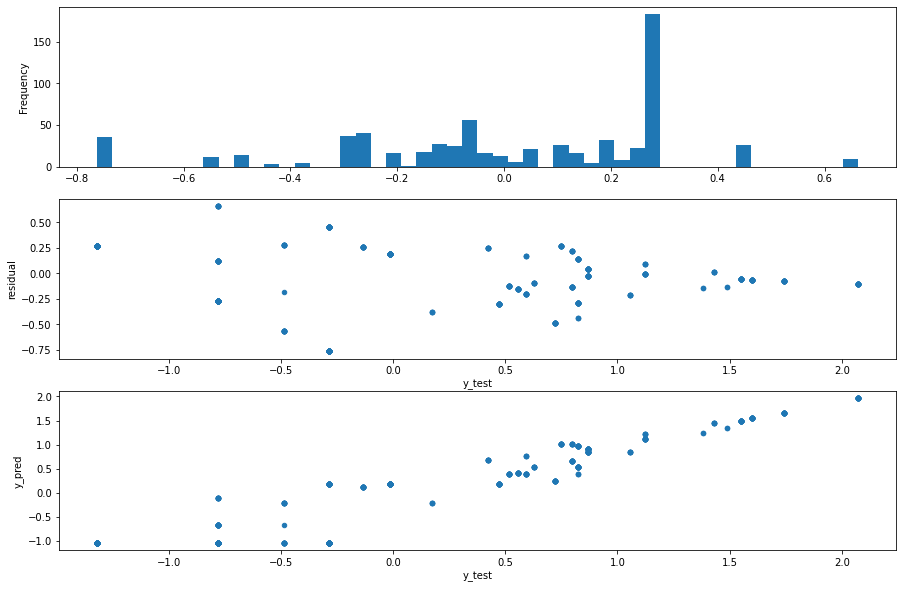

In [384]:
# Select features from std_lm_df
x = std_lm_df[['std_power_last_14_days_cases','std_power_last_30_days_cases','std_power_last_60_days_cases']]

# Select target variable from std_lm_df
y = std_lm_df['std_power_30_sep_cases']

# Split train and test data 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state =  123)

x_train.reset_index(drop = True,inplace = True)
x_test.reset_index(drop = True,inplace = True)
y_train.reset_index(drop = True,inplace = True)
y_test.reset_index(drop = True,inplace = True)
y_test.reset_index(drop = True,inplace = True)

# Fit linear regression on train data
lm = LinearRegression()
lm.fit(x_train,y_train)

# Use the model to predict on test data
y_pred = lm.predict(x_test)

# Calculate R-square on test data
print('R-Square of the model with log transformation is '+str(round(r2_score(y_test,y_pred),4)))

# Calculate MSE  on test data
print('Mean Square Errors(MSE) of the model with log  transformation is '+str(round(mean_squared_error(y_test,y_pred),4)))

# Create residual dataframe used for ploting
residual_df = pd.DataFrame()
residual_df['y_pred']= y_pred
residual_df['y_test']= y_test
residual_df['residual'] = y_pred-y_test

# Plot 3 graphs to check linear model assumption
fig, axes = plt.subplots(nrows=3, ncols=1,figsize = (15,10))
residual_df['residual'].plot.hist(bins = 50,ax=axes[0])
residual_df.plot.scatter(x='y_test', y= 'residual',ax=axes[1])
residual_df.plot.scatter(x='y_test', y= 'y_pred',ax=axes[2]) 

# residual stat
residual_df.describe()

### 4.6 Linear Model of Standardised Original Data with Outlier Removal

R-Square of the model without transformation is 0.9841
Mean Square Errors(MSE) of the model without transformation is 0.0065


,y_pred,y_test,residual
count,662.000000,662.000000,662.000000
mean,-0.098449,-0.111060,0.012611
std,0.639512,0.643066,0.079978
min,-0.435045,-0.468551,-0.388565
25%,-0.435045,-0.468551,-0.014685
50%,-0.304447,-0.388639,0.033506
75%,-0.118380,-0.029035,0.053910
max,2.745145,2.568100,0.181889


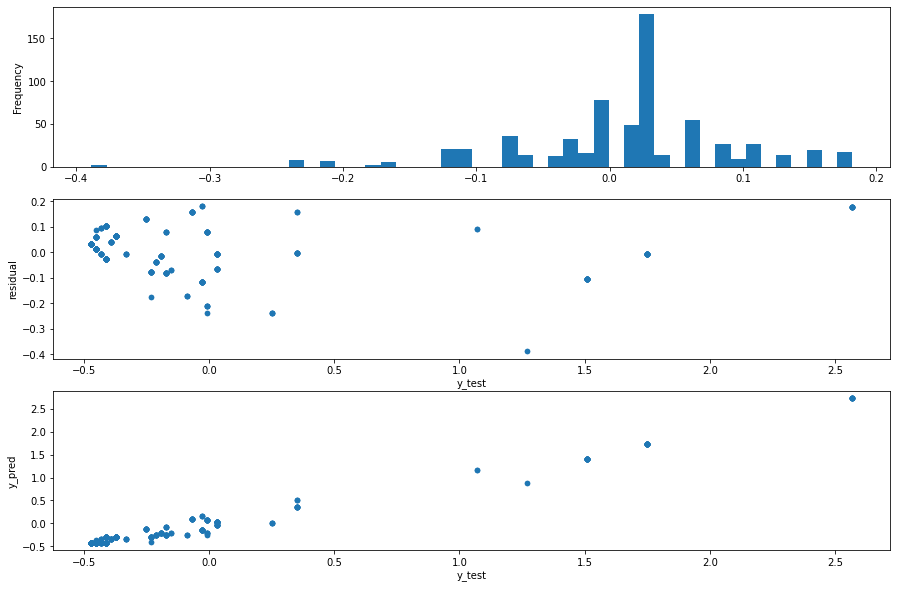

In [385]:
#  Select features from std_lm_df with outlier removal
x = std_lm_df.loc[(std_lm_df['std_30_sep_cases']<=3)  & (std_lm_df['std_30_sep_cases']>= -3),['std_last_14_days_cases','std_last_30_days_cases','std_last_60_days_cases']]

# Select target variable from std_lm_df with outlier removal
y = std_lm_df.loc[(std_lm_df['std_30_sep_cases']<=3)  & (std_lm_df['std_30_sep_cases']>= -3),'std_30_sep_cases']

# Split train and test data 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state =  123)

x_train.reset_index(drop = True,inplace = True)
x_test.reset_index(drop = True,inplace = True)
y_train.reset_index(drop = True,inplace = True)
y_test.reset_index(drop = True,inplace = True)
y_test.reset_index(drop = True,inplace = True)

# Fit linear regression on train data
lm = LinearRegression()
lm.fit(x_train,y_train)

# Use the model to predict on test data
y_pred = lm.predict(x_test)

# Calculate R-square on test data
print('R-Square of the model without transformation is '+str(round(r2_score(y_test,y_pred),4)))

# Calculate MSE  on test data
print('Mean Square Errors(MSE) of the model without transformation is '+str(round(mean_squared_error(y_test,y_pred),4)))

# Create residual dataframe used for ploting
residual_df = pd.DataFrame()
residual_df['y_pred']= y_pred
residual_df['y_test']= y_test
residual_df['residual'] = y_pred-y_test

# Plot 3 graphs to check linear model assumption
fig, axes = plt.subplots(nrows=3, ncols=1,figsize = (15,10))
residual_df['residual'].plot.hist(bins = 50,ax=axes[0])
residual_df.plot.scatter(x='y_test', y= 'residual',ax=axes[1])
residual_df.plot.scatter(x='y_test', y= 'y_pred',ax=axes[2]) 

# residual stat
residual_df.describe()

### 4.7 Model Summary

In summary, all model performances are shown in the table below using R square and MSE on testing data. As a result, transforming the data did not improve model performance as testing R square did not increase and MSE did not decrease. However, removing outlier from the dataset and use original data did improve model performance 



| Model| R square	| MSE | 
|:-:   |:-:	      |:-:	|
| 4.1 Linear Model of Standardised Original Data | 0.9716  | 0.0397  | 
| 4.2 Linear Model of Standardised Data with Log Transformation|0.9264| 0.0792|
| 4.3 Linear Model of Standardised Data with Cube Root Transformation | 0.9272| 0.0823    |
| 4.4 Linear Model of Standardised Data with Box-cox Transformation                                             | 0.7855       | 0.2256    | 
| 4.5 Linear Model of Standardised Data with Power Transformation                                              | 0.9096      | 0.0953    | 
| 4.6 Linear Model of Standardised Original Data with Outlier Removal                                              | 0.9841      | 0.0065   | 




## 5.Summary

In summary, we perform several subtasks, which are

1.  Exploratory Data Analysis (EDA) on COVID Attributes
2.  Data Transformation
* 2.1 Adjusted Log Transformation
* 2.2 Cube Root Transformation
* 2.3 Adjusted Box-cox Transformation
* 2.4 Power Transformation (Yeo-Johnson)
* 2.5 Visualisation on Distributions
* 2.6 Visualisation on relationships

3.  Data Normalisation
* 3.1 Standardisation (Z-score)
3.2 MinMax Normalisation
3.3 Visualisation for Data Distrubtion After Normalisation

4.  Model Evaluation

* 4.1 Linear Model of Standardised Original Data
* 4.2 Linear Model of Standardised Data with Log Transformation
* 4.3 Linear Model of Standardised Data with Cube Root Transfromation
* 4.4 Linear Model of Standardised Data with Box-cox Transformation
* 4.5 Linear Model of Standardised Data with Power Transformation
* 4.6 Linear Model of Standardised Original Data with Outlier Removal
* 4.7 Model Summary

To answer the question from the specification "You need to first explore the data to see if any scaling or transformation is necessary (if yes why? and if not, also why? ", this can be concluded that scaling(standardisation) is necessary, while transformation is not. In scaling perspective, it is said in the requirement that "We want features to be in the same scale" so to do that scaling/ normalisation is necessary since when we do EDA, we found that COVID attributes have different means and variancs. Also, even linear regression does not require us to do scaling, it is a good practice to do it beforehand since it can potentially increase efficiency on computation. On the other side, which is data transformation, it is not required in this case because doing that cannot lead to better linear model performance as shown in the section 4 above. However, linear model can be improved from other ways such as removing outlier (as we did in 4.6) or include more relevant features.



# Reference

- Extract text from a PDF using python - part 2. Extract text from a PDF using Python - part 2 - pdfminer.six 20201018 documentation. (n.d.). Retrieved October 27, 2021, from https://pdfminersix.readthedocs.io/en/latest/tutorial/composable.html. 

-  Using pandas to calculate distance between coordinates from imported CSV. Stack Overflow. Retrieved October 27, 2021, from https://stackoverflow.com/questions/33029396/using-pandas-to-calculate-distance-between-coordinates-from-imported-csv. 

- Wikimedia Foundation. (2021, September 24). Haversine formula. Wikipedia. Retrieved October 27, 2021, from https://en.wikipedia.org/wiki/Haversine_formula. 

- Macali, A. (n.d.). Cases by LGA in Victoria - Covid Live. 163,866 Coronavirus cases in Australia - COVID Live. Retrieved October 27, 2021, from https://covidlive.com.au/report/cases-by-lga/vic. 

- Bhalla, D. (n.d.). Regression : Transform negative values. ListenData. Retrieved October 27, 2021, from https://www.listendata.com/2015/09/regression-transform-negative-values.html. 

- Steve, Imran, Aayushmnit, hinduja1234, Dhamraj, mehmood64, huseyin60, Ilker, &amp; tony888. (2015, July 23). Methods to deal with zero values while performing log transformation of variable. Data Science, Analytics and Big Data discussions. Retrieved October 27, 2021, from https://discuss.analyticsvidhya.com/t/methods-to-deal-with-zero-values-while-performing-log-transformation-of-variable/2431/2. 

- Rick Wicklin on The DO Loop. (2011, April 27). Log transformations: How to handle negative data values? The DO Loop. Retrieved October 27, 2021, from https://blogs.sas.com/content/iml/2011/04/27/log-transformations-how-to-handle-negative-data-values.html.

- The Trustees of Princeton University. (n.d.). GR's website. Princeton University. Retrieved October 27, 2021, from https://data.princeton.edu/wws509/notes/c2s10. 